# 0. Librairie

In [1]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns

# 1. Configuration de l'affichage

In [2]:
# Le maximum de lignes affichés lors de l'appel d'un dataframe est défini.
pd.options.display.max_rows = 20

In [3]:
# Paramètres d'affichage des graphiques.
plt.rcParams['figure.figsize'] = (20, 10)
plt.rcParams.update({'font.size': 16})
plt.rcParams['figure.dpi'] = 80

In [4]:
# Les chiffres après la virgule ne sont pas affichés 
# (cela concerne uniquement l'affichage de la dataframe!).
pd.set_option('display.float_format','{:.2f}'.format) 

# 2. Importation et nettoyage des fichiers sources

## 2.1 Le fichier "products.csv"

In [5]:
df_products = pd.read_csv("DAN-P6-donnees/products.csv")
df_products                        

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0
...,...,...,...
3282,2_23,115.99,2
3283,0_146,17.14,0
3284,0_802,11.22,0
3285,1_140,38.56,1


In [6]:
df_products.dtypes

id_prod     object
price      float64
categ        int64
dtype: object

In [7]:
df_products.isna().sum()

id_prod    0
price      0
categ      0
dtype: int64

In [8]:
# AXIS = 1 => sur chaque LIGNE, on vérifie le nombre de cellules vides
df_products[df_products.isna().any(axis=1)]

,id_prod,price,categ


In [9]:
df_products[df_products.duplicated()== True]

,id_prod,price,categ


In [10]:
df_products['id_prod'].str.match(r'(\d_\d+)')
df_products['id_prod'].str.match(r'(\d_\d+)').count()

3287

In [11]:
#categ_id_prod = df_products['id_prod'].str[:1].astype(int)
# Un "id_prod" semble contenir le caractère T.
df_products[df_products['id_prod'].str.contains("T")== True]
# On retire la ligne.
ligne_a_suppr = df_products[df_products['id_prod'].str.contains("T")== True].index
df_products.drop(ligne_a_suppr, inplace = True)
df_products.shape

(3286, 3)

In [12]:
# On extrait le premier élément de l'id_prod.
categ_id_prod = df_products['id_prod'].str[:1].astype(int)
categ_id_prod

0       0
1       0
2       0
3       1
4       0
       ..
3282    2
3283    0
3284    0
3285    1
3286    0
Name: id_prod, Length: 3286, dtype: int64

In [13]:
# On vérifie que le premier élément de l'id_prod correspond à la colonne "categ".
(categ_id_prod.isin(df_products['categ']) == True).count()
# L'id_prod de chaque ligne de la dataframe est en accord avec la colonne "categ".

3286

**Remarque: On maintient les id_prod en tant qu'objet.**

In [14]:
df_products[df_products['id_prod'].str.match(r'(\d_1549)')]

,id_prod,price,categ
88,0_1549,25.99,0


In [15]:
df_products[df_products['id_prod'].str.match(r'(\d_549)')]

,id_prod,price,categ
37,1_549,33.99,1
2505,0_549,2.99,0


In [16]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3286 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3286 non-null   object 
 1   price    3286 non-null   float64
 2   categ    3286 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 102.7+ KB


## 2.2 Le fichier "transactions.csv"

In [17]:
df_transactions = pd.read_csv("DAN-P6-donnees/transactions.csv")
df_transactions

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232
...,...,...,...,...
679527,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489
679528,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370
679529,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304
679530,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227


In [18]:
# On modifie le nom de certaines colonnes.
df_transactions = df_transactions.rename(columns = {"session_id": "id_session"})
df_transactions = df_transactions.rename(columns = {"client_id": "id_client"})

In [19]:
# Nombre de cellules vide par colonne
df_transactions.isna().sum()
df_transactions[df_transactions.isna().any(axis =1)]

,id_prod,date,id_session,id_client


In [20]:
# On cherche les lignes en doubles
df_transactions[df_transactions.duplicated() == True]

,id_prod,date,id_session,id_client
27778,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1
52424,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
96687,T_0,test_2021-03-01 02:30:02.237412,s_0,ct_1
130188,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
139339,T_0,test_2021-03-01 02:30:02.237443,s_0,ct_1
...,...,...,...,...
653098,T_0,test_2021-03-01 02:30:02.237432,s_0,ct_0
657830,T_0,test_2021-03-01 02:30:02.237417,s_0,ct_0
662081,T_0,test_2021-03-01 02:30:02.237427,s_0,ct_1
671647,T_0,test_2021-03-01 02:30:02.237424,s_0,ct_1


In [21]:
doublons = df_transactions[df_transactions.duplicated() == True]
doublons["date"].str.contains("test").count()

126

**On décide de supprimer ces doublons, ils correspondent tous à des tests.**

In [22]:
df_transactions.drop(doublons.index, inplace = True)

In [23]:
doublons = df_transactions[df_transactions.duplicated() == True]
doublons["date"].str.contains("test").count()

0

**Les doublons ont bien étés supprimés.**

In [24]:
# Les doublons sont supprimés mais il y a peut-être d'autres lignes qui se réferrent à des tests.
df_transactions[df_transactions["id_prod"].str.contains("T")]

,id_prod,date,id_session,id_client
3019,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
5138,T_0,test_2021-03-01 02:30:02.237425,s_0,ct_0
9668,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1
10728,T_0,test_2021-03-01 02:30:02.237436,s_0,ct_0
15292,T_0,test_2021-03-01 02:30:02.237430,s_0,ct_0
...,...,...,...,...
577324,T_0,test_2021-03-01 02:30:02.237424,s_0,ct_0
593065,T_0,test_2021-03-01 02:30:02.237422,s_0,ct_1
607892,T_0,test_2021-03-01 02:30:02.237412,s_0,ct_0
626049,T_0,test_2021-03-01 02:30:02.237422,s_0,ct_0


In [25]:
# Autres lignes à supprimer
lignes_a_suppr = df_transactions[df_transactions["id_prod"].str.contains("T")].index
df_transactions.drop(lignes_a_suppr, inplace = True)

In [26]:
df_transactions.info()
# On va transformer le type da la variable "date"

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679332 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     679332 non-null  object
 1   date        679332 non-null  object
 2   id_session  679332 non-null  object
 3   id_client   679332 non-null  object
dtypes: object(4)
memory usage: 25.9+ MB


In [27]:
df_transactions["date"]= pd.to_datetime(df_transactions["date"], yearfirst = True)
df_transactions

,id_prod,date,id_session,id_client
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232
...,...,...,...,...
679527,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489
679528,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370
679529,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304
679530,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227


In [28]:
# On vérifie que tous les id_session et id_client suivent la même forme (même expression régulière) pour chaque individu.
df_transactions["id_session"].str.match(r'(s_\d+)').count() # ok
df_transactions["id_client"].str.match(r'(c_\d+)').count() # ok

679332

## 2.3 Le fichier "customers.csv"

In [29]:
df_customers = pd.read_csv("DAN-P6-donnees/customers.csv")
df_customers

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943
...,...,...,...
8618,c_7920,m,1956
8619,c_7403,f,1970
8620,c_5119,m,1974
8621,c_5643,f,1968


In [30]:
df_customers = df_customers.rename(columns= {"client_id" : "id_client"})
df_customers

,id_client,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943
...,...,...,...
8618,c_7920,m,1956
8619,c_7403,f,1970
8620,c_5119,m,1974
8621,c_5643,f,1968


In [31]:
df_customers[df_customers.duplicated() == True]

,id_client,sex,birth


In [32]:
df_customers[df_customers["id_client"].str.match(r'(c_\d)') == False]

,id_client,sex,birth
2735,ct_0,f,2001
8494,ct_1,m,2001


In [33]:
lignes_a_suppr = df_customers[df_customers["id_client"].str.match(r'(c_\d)') == False].index
# ct probablement pour "customer test"

In [34]:
df_customers.drop(lignes_a_suppr , inplace = True)

In [35]:
df_customers.shape

(8621, 3)

In [36]:
df_customers["sex"].unique()

array(['f', 'm'], dtype=object)

In [37]:
# Le type la variable devient booléen.
# f -> 1
# m -> 0 

#df_customers["sex"] = df_customers["sex"].replace({'f':'1'})
#df_customers["sex"] = df_customers["sex"].replace({'m':'0'})
#df_customers["sex"] =  df_customers["sex"].astype(int)
#df_customers["sex"] =  df_customers["sex"].astype(bool)
#df_customers["sex"].unique()
#df_customers["sex"]

df_customers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8621 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id_client  8621 non-null   object
 1   sex        8621 non-null   object
 2   birth      8621 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 269.4+ KB


# 3. Jointure des dataframes

**On effectue d'abord une jointure externe entre la dataframe df_products et df_transactions.
Puis, une autre jointure avec la dataframe df_customers.**

**Ainsi, les produits qui n'ont pas connus au moins une transaction sont visibles. 
De plus, les clients qui ne sont pas associés à une transaction sont également visibles.**

In [38]:
df_p_t = pd.merge(df_products, df_transactions, on="id_prod", how="outer")
df_p_t

,id_prod,price,categ,date,id_session,id_client
0,0_1421,19.99,0.00,2022-02-20 17:04:37.204937,s_168213,c_6389
1,0_1421,19.99,0.00,2022-11-19 03:42:20.707442,s_299590,c_8364
2,0_1421,19.99,0.00,2021-09-19 14:58:46.726179,s_92304,c_3544
3,0_1421,19.99,0.00,2023-01-11 16:04:24.367855,s_325369,c_1025
4,0_1421,19.99,0.00,2021-08-01 19:33:18.877168,s_70071,c_2298
...,...,...,...,...,...,...
679348,0_2245,NaN,NaN,2021-08-25 09:06:03.504061,s_80395,c_131
679349,0_2245,NaN,NaN,2022-03-06 19:59:19.462288,s_175311,c_4167
679350,0_2245,NaN,NaN,2022-05-16 11:35:20.319501,s_209381,c_4453
679351,0_2245,NaN,NaN,2022-02-11 09:05:43.952857,s_163405,c_1098


In [39]:
df_products.dtypes 

id_prod     object
price      float64
categ        int64
dtype: object

In [40]:
df_p_t_c = pd.merge(df_p_t, df_customers, on="id_client", how="outer")
df_p_t_c

,id_prod,price,categ,date,id_session,id_client,sex,birth
0,0_1421,19.99,0.00,2022-02-20 17:04:37.204937,s_168213,c_6389,f,1991.00
1,0_1421,19.99,0.00,2022-10-20 17:04:37.204937,s_285450,c_6389,f,1991.00
2,0_2131,8.99,0.00,2021-10-09 21:47:06.777914,s_102458,c_6389,f,1991.00
3,0_1635,16.99,0.00,2021-04-28 06:08:38.261863,s_26841,c_6389,f,1991.00
4,0_166,1.83,0.00,2021-07-15 10:35:31.526968,s_62585,c_6389,f,1991.00
...,...,...,...,...,...,...,...,...
679369,NaN,NaN,NaN,NaT,NaN,c_862,f,1956.00
679370,NaN,NaN,NaN,NaT,NaN,c_7584,f,1960.00
679371,NaN,NaN,NaN,NaT,NaN,c_90,m,2001.00
679372,NaN,NaN,NaN,NaT,NaN,c_587,m,1993.00


In [41]:
df_p_t_c[df_p_t_c.isna().any(axis=1)]

,id_prod,price,categ,date,id_session,id_client,sex,birth
766,0_2245,NaN,NaN,2022-07-29 04:29:29.995701,s_245285,c_1025,m,1984.00
767,0_2245,NaN,NaN,2021-03-29 04:29:29.995701,s_12938,c_1025,m,1984.00
768,0_2245,NaN,NaN,2022-07-29 02:10:32.403467,s_245233,c_1025,m,1984.00
769,0_2245,NaN,NaN,2021-03-29 02:10:32.403467,s_12886,c_1025,m,1984.00
2096,0_2245,NaN,NaN,2022-07-24 04:18:45.054650,s_242855,c_5953,m,1986.00
...,...,...,...,...,...,...,...,...
679369,NaN,NaN,NaN,NaT,NaN,c_862,f,1956.00
679370,NaN,NaN,NaN,NaT,NaN,c_7584,f,1960.00
679371,NaN,NaN,NaN,NaT,NaN,c_90,m,2001.00
679372,NaN,NaN,NaN,NaT,NaN,c_587,m,1993.00


In [42]:
df_p_t_c.isna().sum()

id_prod        21
price         242
categ         242
date           42
id_session     42
id_client      21
sex            21
birth          21
dtype: int64

**Il semble tout d'abord que le prix et la catégorie du produit ne sont pas renseignés pour 200 produits.
Etant donné que l'id_prod donne des informations sur la catégorie du produit, le prix des produits sera considéré comme celui du prix médian de la catégorie associée.**

In [43]:
sans_price = df_p_t_c[(df_p_t_c.price.isna() == True) & (df_p_t_c.id_prod.isna() == False)].id_prod
sans_price.unique()

array(['0_2245'], dtype=object)

In [44]:
sans_categ = df_p_t_c[(df_p_t_c.categ.isna() == True)& (df_p_t_c.id_prod.isna() == False)].id_prod
sans_categ.unique()

array(['0_2245'], dtype=object)

In [45]:
df_p_t_c[df_p_t_c["id_prod"] == "0_2245"]

,id_prod,price,categ,date,id_session,id_client,sex,birth
766,0_2245,NaN,NaN,2022-07-29 04:29:29.995701,s_245285,c_1025,m,1984.00
767,0_2245,NaN,NaN,2021-03-29 04:29:29.995701,s_12938,c_1025,m,1984.00
768,0_2245,NaN,NaN,2022-07-29 02:10:32.403467,s_245233,c_1025,m,1984.00
769,0_2245,NaN,NaN,2021-03-29 02:10:32.403467,s_12886,c_1025,m,1984.00
2096,0_2245,NaN,NaN,2022-07-24 04:18:45.054650,s_242855,c_5953,m,1986.00
...,...,...,...,...,...,...,...,...
653201,0_2245,NaN,NaN,2021-06-17 03:03:12.668129,s_49705,c_1533,m,1972.00
653202,0_2245,NaN,NaN,2022-03-17 03:03:12.668129,s_180212,c_1533,m,1972.00
653203,0_2245,NaN,NaN,2022-09-17 03:03:12.668129,s_269223,c_1533,m,1972.00
653204,0_2245,NaN,NaN,2022-06-17 03:03:12.668129,s_224972,c_1533,m,1972.00


In [46]:
df_p_t_c["categ"] = np.where(df_p_t_c["id_prod"] == "0_2245",0,df_p_t_c["categ"])
df_p_t_c["price"] = np.where(df_p_t_c["id_prod"] == "0_2245",df_p_t_c[df_p_t_c["categ"]==0].price.median()
                               ,df_p_t_c["price"])  
df_p_t_c[df_p_t_c["id_prod"] == "0_2245"]

,id_prod,price,categ,date,id_session,id_client,sex,birth
766,0_2245,9.99,0.00,2022-07-29 04:29:29.995701,s_245285,c_1025,m,1984.00
767,0_2245,9.99,0.00,2021-03-29 04:29:29.995701,s_12938,c_1025,m,1984.00
768,0_2245,9.99,0.00,2022-07-29 02:10:32.403467,s_245233,c_1025,m,1984.00
769,0_2245,9.99,0.00,2021-03-29 02:10:32.403467,s_12886,c_1025,m,1984.00
2096,0_2245,9.99,0.00,2022-07-24 04:18:45.054650,s_242855,c_5953,m,1986.00
...,...,...,...,...,...,...,...,...
653201,0_2245,9.99,0.00,2021-06-17 03:03:12.668129,s_49705,c_1533,m,1972.00
653202,0_2245,9.99,0.00,2022-03-17 03:03:12.668129,s_180212,c_1533,m,1972.00
653203,0_2245,9.99,0.00,2022-09-17 03:03:12.668129,s_269223,c_1533,m,1972.00
653204,0_2245,9.99,0.00,2022-06-17 03:03:12.668129,s_224972,c_1533,m,1972.00


**On veuille également à ce que l'article "0_2245" soit également présent dans la dataframe d'origine: df_products.**

In [47]:
df_products[df_products["id_prod"]=="0_2245"]

,id_prod,price,categ


In [48]:
len(df_products)

3286

In [49]:
#df_products = df_products.append({"id_prod":"0_2245","price":"9.99", "categ":0}, ignore_index= True)

df_added_products = pd.DataFrame({'id_prod': "0_2245", 'price': "9.99", "categ":0},index=[len(df_products)+1])
df_products = pd.concat([df_products,df_added_products])
df_products

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0
...,...,...,...
3283,0_146,17.14,0
3284,0_802,11.22,0
3285,1_140,38.56,1
3286,0_1920,25.16,0


In [50]:
df_products[df_products["id_prod"]=="0_2245"]

,id_prod,price,categ
3287,0_2245,9.99,0


In [51]:
df_p_t_c.isna().sum()

id_prod       21
price         21
categ         21
date          42
id_session    42
id_client     21
sex           21
birth         21
dtype: int64

In [52]:
# Client sans produits (df_customers: ok / df_products: pas ok : df_transactions: pas ok)
df_p_t_c[df_p_t_c.id_prod.isna() == True]
#df_p_t_c[df_p_t_c.id_prod.isna() == True].count()

,id_prod,price,categ,date,id_session,id_client,sex,birth
679353,NaN,NaN,NaN,NaT,NaN,c_8253,f,2001.00
679354,NaN,NaN,NaN,NaT,NaN,c_3789,f,1997.00
679355,NaN,NaN,NaN,NaT,NaN,c_4406,f,1998.00
679356,NaN,NaN,NaN,NaT,NaN,c_2706,f,1967.00
679357,NaN,NaN,NaN,NaT,NaN,c_3443,m,1959.00
...,...,...,...,...,...,...,...,...
679369,NaN,NaN,NaN,NaT,NaN,c_862,f,1956.00
679370,NaN,NaN,NaN,NaT,NaN,c_7584,f,1960.00
679371,NaN,NaN,NaN,NaT,NaN,c_90,m,2001.00
679372,NaN,NaN,NaN,NaT,NaN,c_587,m,1993.00


In [53]:
df_p_t_c[df_p_t_c.date.isna() == True] 
#df_p_t_c[df_p_t_c.date.isna() == True].count()

,id_prod,price,categ,date,id_session,id_client,sex,birth
607282,0_1016,35.06,0.00,NaT,NaN,NaN,NaN,NaN
607283,0_1780,1.67,0.00,NaT,NaN,NaN,NaN,NaN
607284,0_1062,20.08,0.00,NaT,NaN,NaN,NaN,NaN
607285,0_1119,2.99,0.00,NaT,NaN,NaN,NaN,NaN
607286,0_1014,1.15,0.00,NaT,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
679369,NaN,NaN,NaN,NaT,NaN,c_862,f,1956.00
679370,NaN,NaN,NaN,NaT,NaN,c_7584,f,1960.00
679371,NaN,NaN,NaN,NaT,NaN,c_90,m,2001.00
679372,NaN,NaN,NaN,NaT,NaN,c_587,m,1993.00


In [54]:
# Produits sans clients (df_products: ok / df_customers: pas ok : df_transactions: pas ok)
df_p_t_c[df_p_t_c.id_client.isna() == True]
#df_p_t_c[df_p_t_c.id_prod.isna() == True].count()
#df_p_t_c[df_p_t_c.id_prod.isna() == True].nunique()

,id_prod,price,categ,date,id_session,id_client,sex,birth
607282,0_1016,35.06,0.00,NaT,NaN,NaN,NaN,NaN
607283,0_1780,1.67,0.00,NaT,NaN,NaN,NaN,NaN
607284,0_1062,20.08,0.00,NaT,NaN,NaN,NaN,NaN
607285,0_1119,2.99,0.00,NaT,NaN,NaN,NaN,NaN
607286,0_1014,1.15,0.00,NaT,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
607298,0_1624,24.50,0.00,NaT,NaN,NaN,NaN,NaN
607299,2_86,132.36,2.00,NaT,NaN,NaN,NaN,NaN
607300,0_299,22.99,0.00,NaT,NaN,NaN,NaN,NaN
607301,0_510,23.66,0.00,NaT,NaN,NaN,NaN,NaN


In [55]:
df_p_t_c.shape

(679374, 8)

**Beaucoup trop de variables ne sont pas renseignés, on décide de supprimer ces lignes de la dataframe.**

**Certains clients ne sont pas associés à un produit. Et certains produits ne sont pas associés à un client.**

**Ces lignes réprésentent seulement 0,003 % des transactions enregistrées.**

In [56]:
df_p_t_c.dropna(inplace= True)

In [57]:
df_p_t_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679332 entries, 0 to 679352
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     679332 non-null  object        
 1   price       679332 non-null  float64       
 2   categ       679332 non-null  float64       
 3   date        679332 non-null  datetime64[ns]
 4   id_session  679332 non-null  object        
 5   id_client   679332 non-null  object        
 6   sex         679332 non-null  object        
 7   birth       679332 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 46.6+ MB


In [58]:
df_p_t_c["categ"] = df_p_t_c["categ"].astype(int)
df_p_t_c["birth"] = df_p_t_c["birth"].astype(int)

In [59]:
df_p_t_c.dtypes

id_prod               object
price                float64
categ                  int64
date          datetime64[ns]
id_session            object
id_client             object
sex                   object
birth                  int64
dtype: object

# 4. Analyse des ventes

In [60]:
df = df_p_t_c

## 4.1. Le CA total

In [61]:
df.head()

,id_prod,price,categ,date,id_session,id_client,sex,birth
0,0_1421,19.99,0,2022-02-20 17:04:37.204937,s_168213,c_6389,f,1991
1,0_1421,19.99,0,2022-10-20 17:04:37.204937,s_285450,c_6389,f,1991
2,0_2131,8.99,0,2021-10-09 21:47:06.777914,s_102458,c_6389,f,1991
3,0_1635,16.99,0,2021-04-28 06:08:38.261863,s_26841,c_6389,f,1991
4,0_166,1.83,0,2021-07-15 10:35:31.526968,s_62585,c_6389,f,1991


In [62]:
df["id_client"].isna().sum() # 0
df["id_session"].isna().sum() # 0
df["id_prod"].isna().sum() # 0

0

In [63]:
CA_total = df["price"].sum()

print("CA total:", round(CA_total),"Euros.")
print("Nombre total de ventes:", round(df["id_session"].count()),".")

CA total: 11855936 Euros.
Nombre total de ventes: 679332 .


## 4.2. Le CA par catégorie

In [64]:
CA_et_nbr_prod_par_categ = df.groupby("categ").agg(CA_en_millions_Euros = ("price", np.sum), nbr_produits = ("price",np.size)) 
CA_et_nbr_prod_par_categ.iloc[:,0] = round(CA_et_nbr_prod_par_categ.iloc[:,0]/1E6,2)
CA_et_nbr_prod_par_categ

,CA_en_millions_Euros,nbr_produits
categ,,
0,4.42,415680
1,4.65,227169
2,2.78,36483


In [65]:
tab_CA_total = pd.crosstab(index = CA_et_nbr_prod_par_categ.index,
           columns = CA_et_nbr_prod_par_categ["CA_en_millions_Euros"].sum(),
           values = CA_et_nbr_prod_par_categ["CA_en_millions_Euros"],
           aggfunc = 'sum', 
           #normalize = "all",
           margins = False,
           colnames = ["CA total (en millions d'Euros)"],
           rownames = ["Catégorie"])

tab_CA_total

CA total (en millions d'Euros),11.85
Catégorie,
0,4.42
1,4.65
2,2.78


In [66]:
tab_nbr_prod = pd.crosstab(index = CA_et_nbr_prod_par_categ.index,
           columns = CA_et_nbr_prod_par_categ["nbr_produits"].sum(),
           values = CA_et_nbr_prod_par_categ["nbr_produits"],
           aggfunc = 'sum', 
           #normalize = "all",
           margins = False,
           colnames = ["nbr_produits"],
           rownames = ["Catégorie"])

tab_nbr_prod 

nbr_produits,679332
Catégorie,
0,415680
1,227169
2,36483


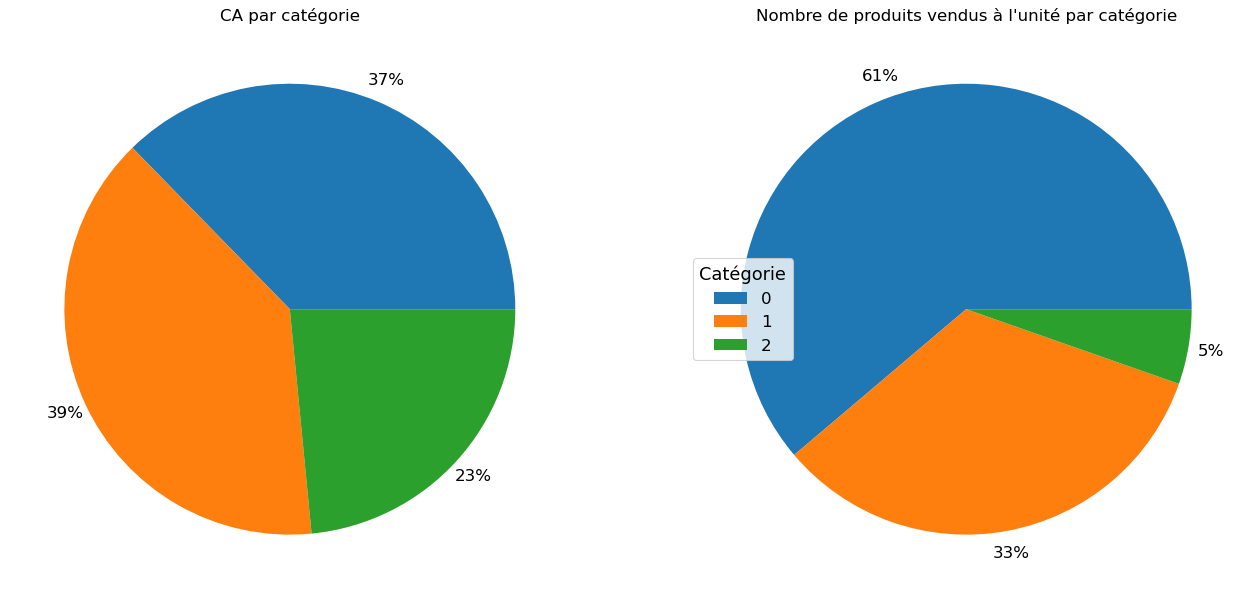

CA total (en millions d'Euros),11.85
Catégorie,
0,4.42
1,4.65
2,2.78


nbr_produits,679332
Catégorie,
0,415680
1,227169
2,36483


In [67]:
# Source: https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_and_donut_labels.html

fig, axes = plt.subplots(1, 2, figsize=(20, 15))

# Données sources
data = CA_et_nbr_prod_par_categ['CA_en_millions_Euros']
tranche = CA_et_nbr_prod_par_categ['CA_en_millions_Euros'].index

# On mets en forme le camembert.
axes[0].pie(data,autopct="%1.f%%", pctdistance= 1.1, textprops={'fontsize': 15}) 

# Légende
#axes[0].legend(tranche,
          #loc="lower right",
          #bbox_to_anchor=(-.5,0,0.5,1))

# Titre
axes[0].set_title("CA par catégorie", size =15)



#-------------------------------


# Données sources
data = CA_et_nbr_prod_par_categ['nbr_produits']
tranche = CA_et_nbr_prod_par_categ['nbr_produits'].index

# On mets en forme le camembert.
axes[1].pie(data,autopct="%1.f%%", pctdistance= 1.1, textprops={'fontsize': 15}) 


# Titre


# Légende
axes[1].legend(tranche,title= "Catégorie",
          loc="center left",
          prop={'size': 15})#,
          #bbox_to_anchor=(-.5,0,0.5,1))

# Titre
axes[1].set_title("Nombre de produits vendus à l'unité par catégorie", size =15)


plt.show()

display(tab_CA_total)
display(tab_nbr_prod)

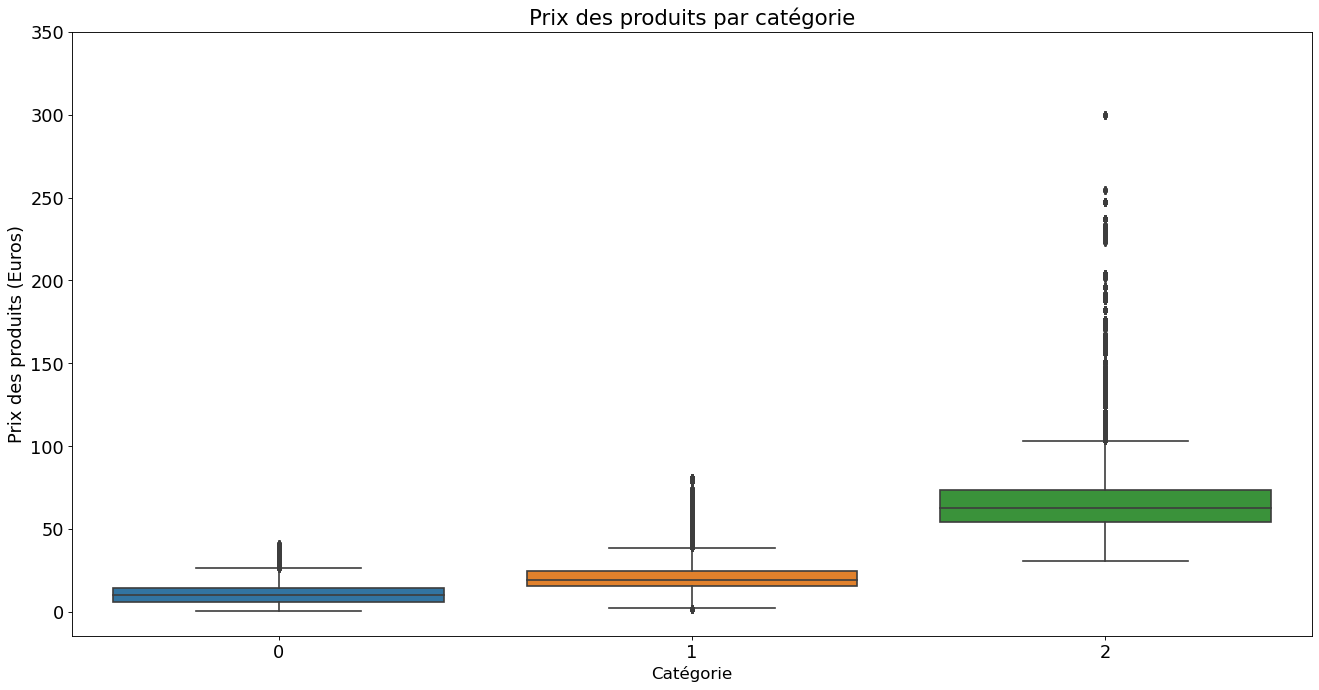

In [68]:
#Boxplot price par catégorie

fig, ax = plt.subplots()

sns.boxplot(x= 'categ', y= "price", 
            data= df).set(xlabel= '', ylabel= 'Prix des produits (Euros)')

# Graduation de l'axe y.
start, end = ax.get_ylim()
ax.yaxis.set_ticks(np.arange(0, 400, 50))
# Graduation de l'axe x.
ax.set_xlabel("Catégorie", size =15)

plt.title("Prix des produits par catégorie")

plt.show() 

In [69]:
df.groupby("categ")[["price"]].describe().T

categ               0         1        2
price count 415680.00 227169.00 36483.00
      mean      10.64     20.49    76.21
      std        4.93      7.58    39.75
      min        0.62      2.00    30.99
      25%        6.29     15.81    53.99
      50%        9.99     19.08    62.83
      75%       14.45     24.98    73.72
      max       40.99     80.99   300.00

## 4.4 Produits les plus achetés (en général et par catégorie)

In [70]:
prod_plus_ach = df["id_prod"].value_counts()
type(prod_plus_ach) # Series

df_prod_plus_ach = pd.DataFrame(prod_plus_ach)
df_prod_plus_ach

,id_prod
1_369,2252
1_417,2189
1_414,2180
1_498,2128
1_425,2096
...,...
0_833,1
0_807,1
0_1284,1
0_1151,1


In [71]:
df[df["id_prod"] == "1_369"]

,id_prod,price,categ,date,id_session,id_client,sex,birth
201,1_369,23.99,1,2022-11-15 12:24:35.494655,s_297902,c_6389,f,1991
202,1_369,23.99,1,2021-03-15 12:24:35.494655,s_6653,c_6389,f,1991
1009,1_369,23.99,1,2022-01-22 11:29:23.097857,s_153503,c_2298,m,1972
1010,1_369,23.99,1,2022-11-22 11:29:23.097857,s_301123,c_2298,m,1972
2009,1_369,23.99,1,2022-09-05 01:56:17.592373,s_263398,c_5953,m,1986
...,...,...,...,...,...,...,...,...
678723,1_369,23.99,1,2021-11-04 10:43:05.096960,s_114614,c_6578,m,1992
679328,1_369,23.99,1,2023-02-27 08:59:50.979490,s_347637,c_3058,m,1959
679329,1_369,23.99,1,2022-02-27 08:59:50.979490,s_171605,c_3058,m,1959
679330,1_369,23.99,1,2022-12-27 08:59:50.979490,s_317995,c_3058,m,1959


In [72]:
df_prod_plus_ach = df_prod_plus_ach.reset_index()
df_prod_plus_ach

,index,id_prod
0,1_369,2252
1,1_417,2189
2,1_414,2180
3,1_498,2128
4,1_425,2096
...,...,...
3261,0_833,1
3262,0_807,1
3263,0_1284,1
3264,0_1151,1


In [73]:
df_prod_plus_ach["index"].isin(df["id_prod"])== True
df_prod_plus_ach = df_prod_plus_ach[df_prod_plus_ach["index"].isin(df["id_prod"])== True]
df_prod_plus_ach

,index,id_prod
0,1_369,2252
1,1_417,2189
2,1_414,2180
3,1_498,2128
4,1_425,2096
...,...,...
3261,0_833,1
3262,0_807,1
3263,0_1284,1
3264,0_1151,1


In [74]:
df_prod_plus_ach = df_prod_plus_ach.rename(columns = {"id_prod":"nbr_vente"})
df_prod_plus_ach = df_prod_plus_ach.rename(columns = {"index":"id_prod"})
df_prod_plus_ach

,id_prod,nbr_vente
0,1_369,2252
1,1_417,2189
2,1_414,2180
3,1_498,2128
4,1_425,2096
...,...,...
3261,0_833,1
3262,0_807,1
3263,0_1284,1
3264,0_1151,1


In [75]:
df_prod_plus_ach.isna().sum()

id_prod      0
nbr_vente    0
dtype: int64

In [76]:
# Je recupère d'autres informations relative à l'id_produit
nbr_prod_plus_ach = pd.merge(df_prod_plus_ach, df_products, on="id_prod", how="left")
nbr_prod_plus_ach.isna().sum()
nbr_prod_plus_ach.isna().any()
nbr_prod_plus_ach[nbr_prod_plus_ach["price"].isna()]

,id_prod,nbr_vente,price,categ


In [77]:
nbr_prod_plus_ach

,id_prod,nbr_vente,price,categ
0,1_369,2252,23.99,1
1,1_417,2189,20.99,1
2,1_414,2180,23.83,1
3,1_498,2128,23.37,1
4,1_425,2096,16.99,1
...,...,...,...,...
3261,0_833,1,2.99,0
3262,0_807,1,1.99,0
3263,0_1284,1,1.38,0
3264,0_1151,1,2.99,0


In [78]:
#nbr_prod_plus_ach = nbr_prod_plus_ach.set_index("id_prod")
#nbr_prod_plus_ach

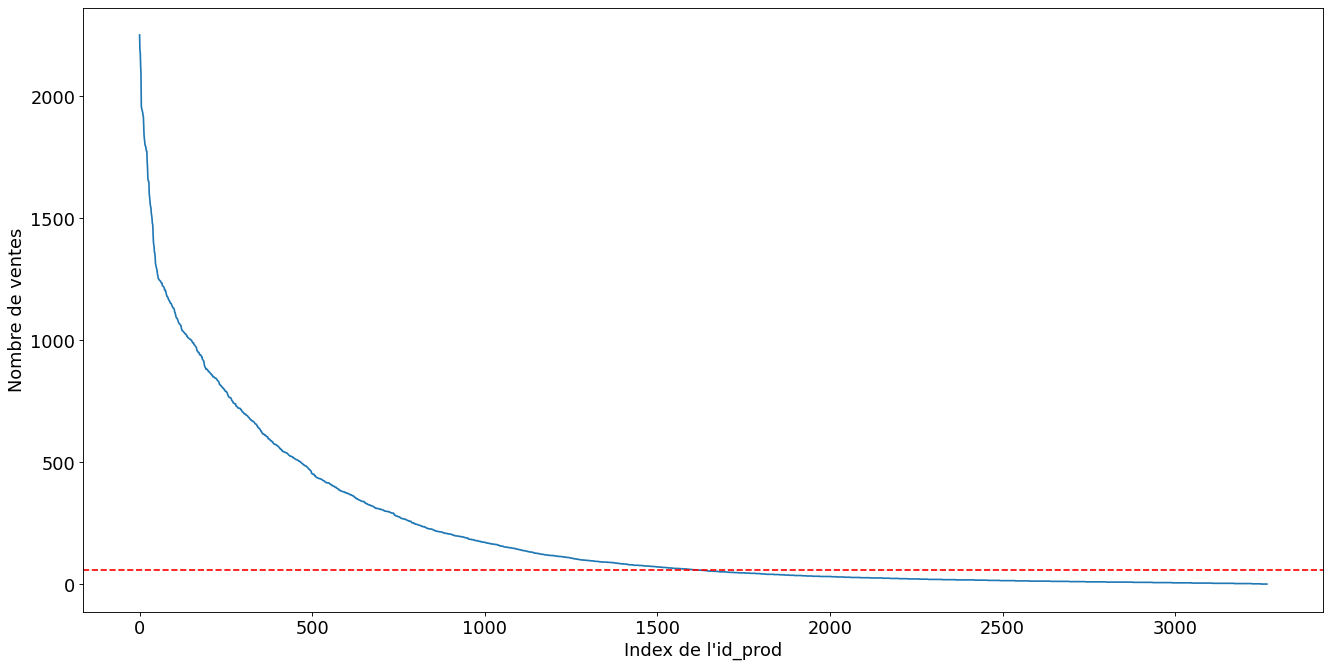

In [79]:
fig, ax = plt.subplots()
plt.plot(nbr_prod_plus_ach.nbr_vente)
plt.ylabel("Nombre de ventes")
plt.xlabel("Index de l'id_prod")
ax.axhline(y = nbr_prod_plus_ach["nbr_vente"].median(), linestyle='dashed', color= 'red')

plt.show()

In [80]:
nbr_prod_plus_ach["nbr_vente"].median()

57.0

In [81]:
nbr_prod_plus_ach.nbr_vente

0       2252
1       2189
2       2180
3       2128
4       2096
        ... 
3261       1
3262       1
3263       1
3264       1
3265       1
Name: nbr_vente, Length: 3266, dtype: int64

In [82]:
nbr_prod_plus_ach.groupby("categ")["id_prod"].count()

categ
0    2293
1     737
2     236
Name: id_prod, dtype: int64

In [83]:
nbr_prod_plus_ach['Type']= ''
nbr_prod_plus_ach

,id_prod,nbr_vente,price,categ,Type
0,1_369,2252,23.99,1,
1,1_417,2189,20.99,1,
2,1_414,2180,23.83,1,
3,1_498,2128,23.37,1,
4,1_425,2096,16.99,1,
...,...,...,...,...,...
3261,0_833,1,2.99,0,
3262,0_807,1,1.99,0,
3263,0_1284,1,1.38,0,
3264,0_1151,1,2.99,0,


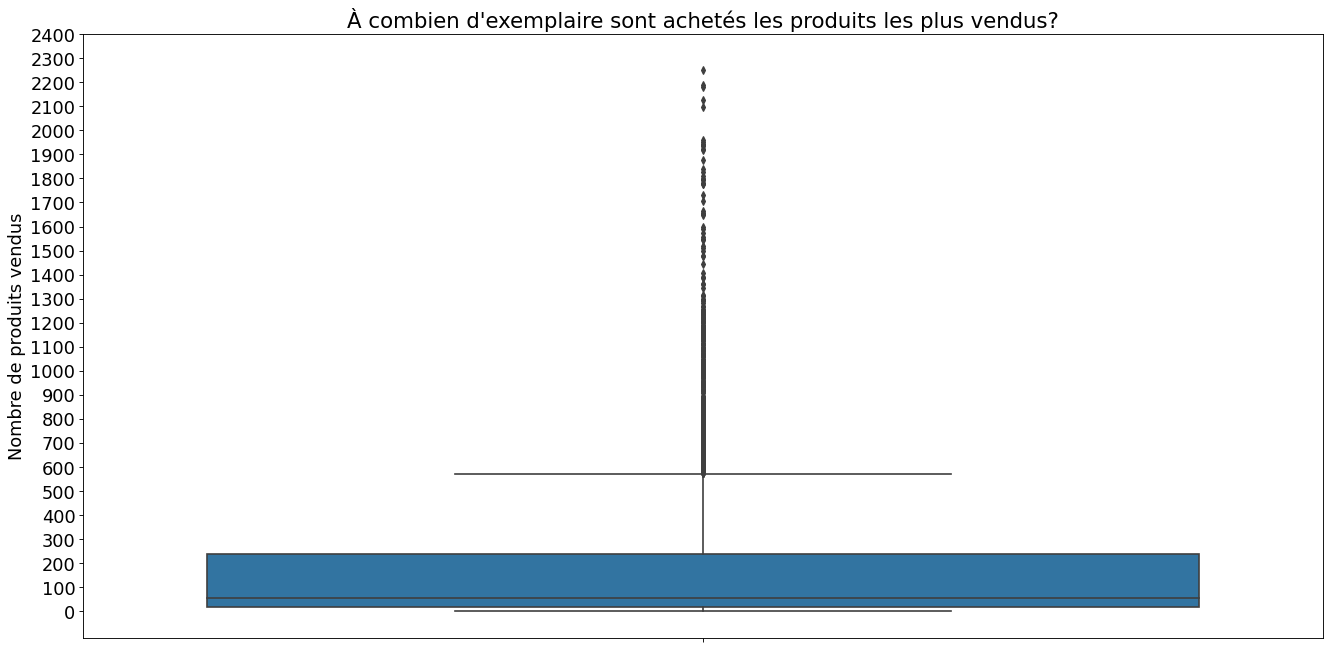

In [84]:
fig, ax = plt.subplots()

nbr_prod_plus_ach['Type']= ''
#sns.boxplot(Test.nbr).set(xlabel="Nbr de produits vendus")

sns.boxplot(x= 'Type', y= "nbr_vente", 
            data= nbr_prod_plus_ach).set(xlabel= '', ylabel= 'Nombre de produits vendus')


# Graduation de l'axe y.
start, end = ax.get_ylim()
ax.yaxis.set_ticks(np.arange(0, 2500, 100))

plt.title("À combien d'exemplaire sont achetés les produits les plus vendus?")

plt.show()

In [85]:
# On détermine les quantiles. 
# Nous n'avons pas besoin de ranger les prix dans l'ordre croissant.
Q1 = round(np.percentile(nbr_prod_plus_ach.nbr_vente, 25, interpolation = 'midpoint'))
Q2 = round(np.percentile(nbr_prod_plus_ach.nbr_vente, 50, interpolation = 'midpoint'))
Q3 = round(np.percentile(nbr_prod_plus_ach.nbr_vente, 75, interpolation = 'midpoint'))


IQR = Q3 - Q1
low_limit = Q1 - 1.5 * IQR
up_limit = Q3 + 1.5 * IQR


print('Limite inférieure:', round(low_limit),".") 
print('Limite supérieure:', round(up_limit),".") 

Limite inférieure: -316 .
Limite supérieure: 572 .


**Les produits concernés par un nombre de ventes nettement supérieur à la valeur médiane (les outliers) sont donnés ci-dessous.**

**On peut les considérer comme nos bestsellers, étant donné que le nombre de produits vendus par rapport aux autres produits est atypiques.**

In [86]:
# Nos bestsellers
outlier =[]
for x in nbr_prod_plus_ach.nbr_vente:
	if ((x> up_limit) or (x<low_limit)):
		outlier.append(x)
print('Valeurs aberrantes ou atypiques:', outlier)
print('Nombre de valeurs aberrantes ou atypiques:', len(outlier))


nbr_prod_plus_ach[nbr_prod_plus_ach.nbr_vente > up_limit]

Valeurs aberrantes ou atypiques: [2252, 2189, 2180, 2128, 2096, 1960, 1951, 1945, 1939, 1935, 1921, 1917, 1875, 1839, 1825, 1809, 1799, 1798, 1792, 1781, 1776, 1776, 1732, 1708, 1664, 1655, 1654, 1647, 1599, 1588, 1572, 1556, 1548, 1543, 1519, 1512, 1499, 1479, 1477, 1443, 1406, 1392, 1385, 1361, 1359, 1344, 1316, 1309, 1300, 1295, 1292, 1282, 1269, 1266, 1254, 1252, 1251, 1247, 1246, 1245, 1243, 1242, 1238, 1236, 1235, 1235, 1224, 1223, 1222, 1221, 1219, 1217, 1209, 1209, 1204, 1204, 1200, 1191, 1188, 1181, 1180, 1179, 1174, 1173, 1167, 1164, 1163, 1161, 1157, 1153, 1153, 1151, 1150, 1146, 1143, 1138, 1136, 1133, 1132, 1132, 1128, 1122, 1114, 1113, 1106, 1100, 1094, 1093, 1091, 1090, 1085, 1083, 1076, 1073, 1070, 1068, 1067, 1065, 1064, 1062, 1059, 1049, 1046, 1041, 1039, 1039, 1037, 1036, 1034, 1033, 1030, 1028, 1027, 1026, 1026, 1023, 1021, 1017, 1017, 1014, 1011, 1010, 1009, 1008, 1008, 1006, 1005, 1004, 1002, 1002, 1000, 999, 995, 993, 990, 990, 990, 986, 982, 981, 980, 978, 975, 

,id_prod,nbr_vente,price,categ,Type
0,1_369,2252,23.99,1,
1,1_417,2189,20.99,1,
2,1_414,2180,23.83,1,
3,1_498,2128,23.37,1,
4,1_425,2096,16.99,1,
...,...,...,...,...,...
390,0_1558,574,11.19,0,
391,1_622,574,17.41,1,
392,0_1534,574,4.62,0,
393,0_1324,574,3.93,0,


In [87]:
bestsellers = nbr_prod_plus_ach[nbr_prod_plus_ach.nbr_vente > up_limit]
pr_camenbert_bs = bestsellers.groupby("categ")[["id_prod"]].count()
pr_camenbert_bs

,id_prod
categ,
0,244
1,130
2,21


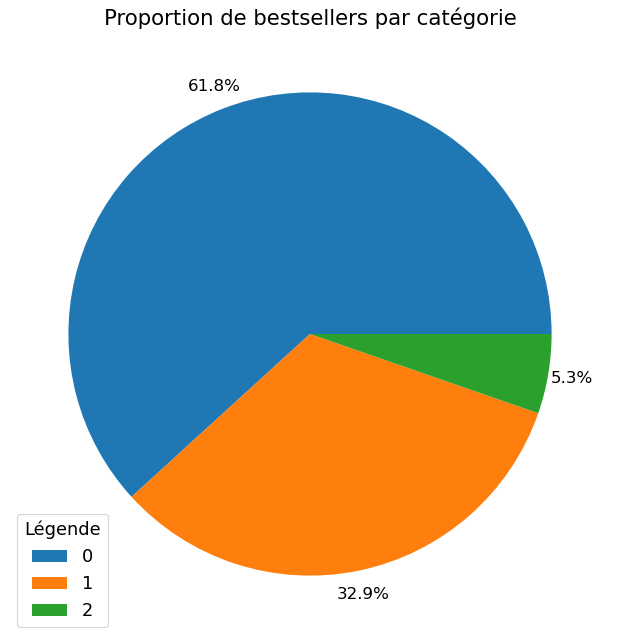

In [88]:
x = pr_camenbert_bs["id_prod"]
plt.pie(x,autopct="%1.1f%%", pctdistance= 1.1, textprops={'fontsize': 15})
#axes.set_title('', size = 15)
plt.legend(pr_camenbert_bs.index, title = "Légende") 
           #bbox_to_anchor=(-0.1, 0.65)) 
plt.title("Proportion de bestsellers par catégorie")    

plt.show()

In [89]:
pr_camenbert = nbr_prod_plus_ach.groupby('categ')[["id_prod"]].count()
pr_camenbert

,id_prod
categ,
0,2293
1,737
2,236


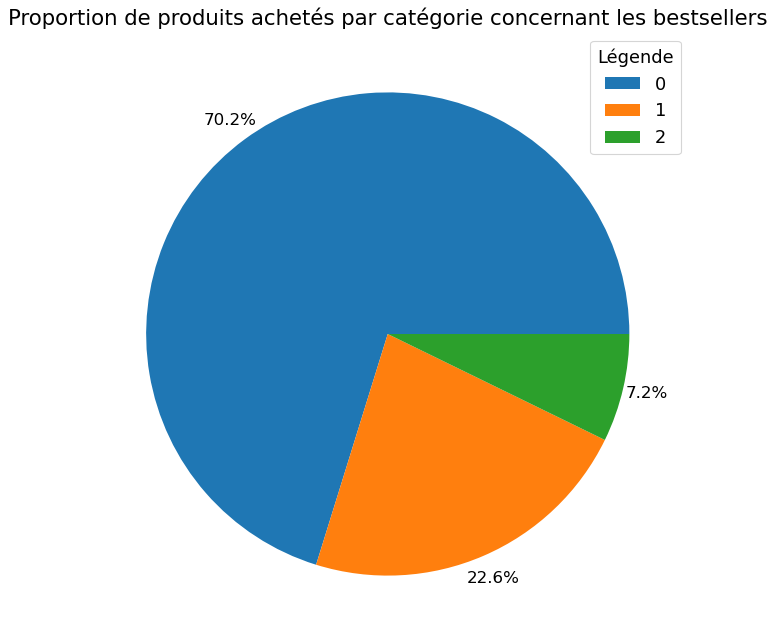

In [90]:
x = pr_camenbert["id_prod"]
plt.pie(x,autopct="%1.1f%%", pctdistance= 1.1, textprops={'fontsize': 15})
#axes.set_title('', size = 15)
plt.legend(pr_camenbert.index, title = "Légende") 
           #bbox_to_anchor=(-0.1, 0.65)) 
plt.title("Proportion de produits achetés par catégorie concernant les bestsellers")    
plt.show()

In [91]:
bestsellers.drop(columns = "Type")

,id_prod,nbr_vente,price,categ
0,1_369,2252,23.99,1
1,1_417,2189,20.99,1
2,1_414,2180,23.83,1
3,1_498,2128,23.37,1
4,1_425,2096,16.99,1
...,...,...,...,...
390,0_1558,574,11.19,0
391,1_622,574,17.41,1
392,0_1534,574,4.62,0
393,0_1324,574,3.93,0


## 4.5 Influence des bestsellers sur le CA

In [92]:
bestsellers_CA = bestsellers.apply(lambda row: row.nbr_vente * row.price, axis = 1)
bestsellers_CA



bestsellers_CA.sum()
print("Les bestsellers apportent",round(bestsellers_CA.sum()), 'd\'Euros.')
print("Soit",round(bestsellers_CA.sum()/CA_total,3)*100,'% du CA.')

Les bestsellers apportent 6372147 d'Euros.
Soit 53.7 % du CA.


## 4.6 Produits les moins achetés (en générale et par catéorie)

In [93]:
nbr_prod_plus_ach.sort_values(by="nbr_vente", ascending= True).head(20)

,id_prod,nbr_vente,price,categ,Type
3265,2_98,1,149.74,2,
3248,0_886,1,21.82,0,
3249,2_23,1,115.99,2,
3250,2_81,1,86.99,2,
3251,0_541,1,1.99,0,
3252,0_1379,1,2.99,0,
3253,0_1601,1,1.99,0,
3254,0_1683,1,2.99,0,
3255,0_1728,1,2.27,0,
3264,0_1151,1,2.99,0,


In [94]:
# Nos floap
nbr_vente_floap = 2

floap =[]
for x in nbr_prod_plus_ach.nbr_vente:
	if (x<nbr_vente_floap):
		floap.append(x)
print('Nombre de produits les moins vendus:', len(floap))


nbr_prod_plus_ach[nbr_prod_plus_ach.nbr_vente < nbr_vente_floap]

Nombre de produits les moins vendus: 18


,id_prod,nbr_vente,price,categ,Type
3248,0_886,1,21.82,0,
3249,2_23,1,115.99,2,
3250,2_81,1,86.99,2,
3251,0_541,1,1.99,0,
3252,0_1379,1,2.99,0,
3253,0_1601,1,1.99,0,
3254,0_1683,1,2.99,0,
3255,0_1728,1,2.27,0,
3256,0_1498,1,2.48,0,
3257,0_549,1,2.99,0,


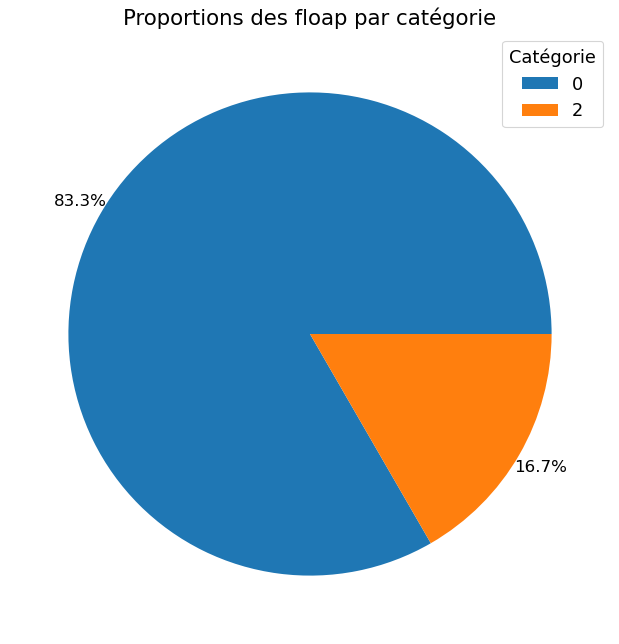

In [95]:
pr_pie = nbr_prod_plus_ach[nbr_prod_plus_ach.nbr_vente < nbr_vente_floap].groupby("categ")[["id_prod"]].count()

x = pr_pie["id_prod"]
plt.pie(x,autopct="%1.1f%%", pctdistance= 1.1, textprops={'fontsize': 15} )
plt.legend(pr_pie.index, title="Catégorie")
plt.title("Proportions des floap par catégorie")

plt.show()

Les floaps se repartissement dans chaque catégorie de façons similaire aux bestsellers et au nombre de ventes par catégorie de façons générales.

## 4.6 Évolution du CA dans le temps

In [96]:
df.dtypes  # date:  datetime64[ns]
df.describe(datetime_is_numeric=True)
df.dtypes  # date:  datetime64[ns]

id_prod               object
price                float64
categ                  int64
date          datetime64[ns]
id_session            object
id_client             object
sex                   object
birth                  int64
dtype: object

In [97]:
df = df.sort_values(by="date", ascending=True)
df

,id_prod,price,categ,date,id_session,id_client,sex,birth
633192,0_1259,11.99,0,2021-03-01 00:01:07.843138,s_1,c_329,f,1967
273771,0_1390,19.37,0,2021-03-01 00:02:26.047414,s_2,c_664,m,1960
55629,0_1352,4.50,0,2021-03-01 00:02:38.311413,s_3,c_580,m,1988
209962,0_1458,6.55,0,2021-03-01 00:04:54.559692,s_4,c_7912,f,1989
293192,0_1358,16.49,0,2021-03-01 00:05:18.801198,s_5,c_2033,f,1956
...,...,...,...,...,...,...,...,...
181209,1_508,21.92,1,2023-02-28 23:49:03.148402,s_348444,c_3573,f,1996
269714,2_37,48.99,2,2023-02-28 23:51:29.318531,s_348445,c_50,f,1994
533169,1_695,26.99,1,2023-02-28 23:53:18.929676,s_348446,c_488,f,1985
254099,0_1547,8.99,0,2023-02-28 23:58:00.107815,s_348447,c_4848,m,1953


In [98]:
df['yyyy-mm'] = df['date'].dt.strftime('%Y-%m') # dtypes: object

In [99]:
CA_median = df.groupby("yyyy-mm")["price"].sum().median()

Source: https://pbpython.com/pandas-grouper-agg.html

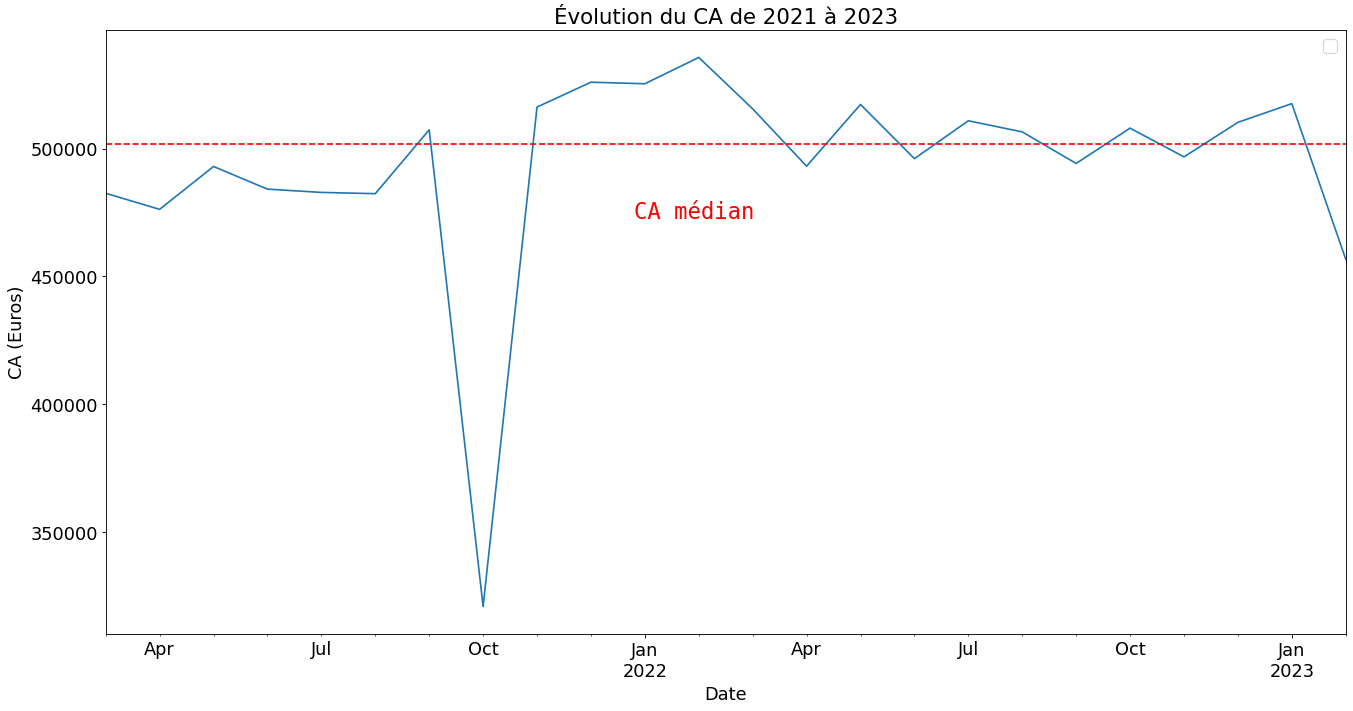

In [100]:
# pd.Grouper, ici nous permet de donner d'affiner les critères pour grouper les lignes!
df.groupby(pd.Grouper(key='date', axis=0, 
                      freq='M'))[['price']].sum().plot( 
ylabel='CA (Euros)', 
xlabel='Date', 
title='Évolution du CA de 2021 à 2023')
plt.legend('')
plt.axhline(y = CA_median, linestyle='dashed', color= 'red', )

# Texte
plt.text(x=0.35, # en bas à gauche (0.0), en haut à droite (1,1) avec transform=ax.transAxes
               y=0.65, # en bas à gauche (0.0), en haut à droite (1,1) avec transform=ax.transAxes
               s =  "CA médian", # texte
               fontdict= dict(fontsize=20, family= 'monospace', alpha= 1)    
              ,transform=ax.transAxes, color = 'red')
plt.show()

**Au mois d'Octobre 2021, on note une forte baisse du CA! Ce mois sera étudié avec plus de précision afin de comprendre à quoi cette baisse peut-être dû.**

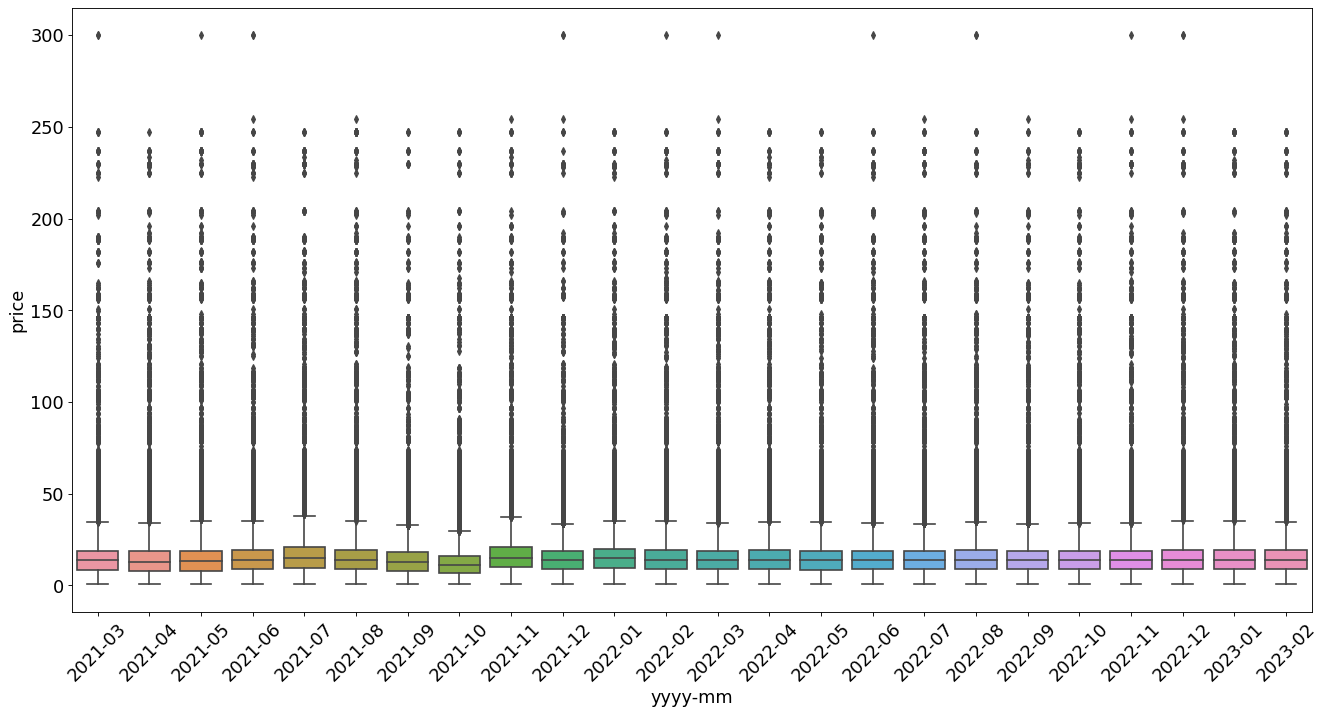

In [101]:
# Le prix (unitaire) des produits vendus 

sns.boxplot(data=df, x="yyyy-mm", y="price")
plt.xticks(rotation = 45)
plt.show()


**Le prix median des achats en générale varie peu au cours des mois. Les ventes sont stables.**

**En revanche, on remarque également ici que le mois d'Octobre 2021 présente une baisse du CA.**

**Nous utilisons un heatmap pour analyser les ventes plus précisement. 
On regarde l'évolution de ventes chaque mois de chaque année.
Plus la couleur dans le headmap est claire, plus le nombre de vente est elevé.**

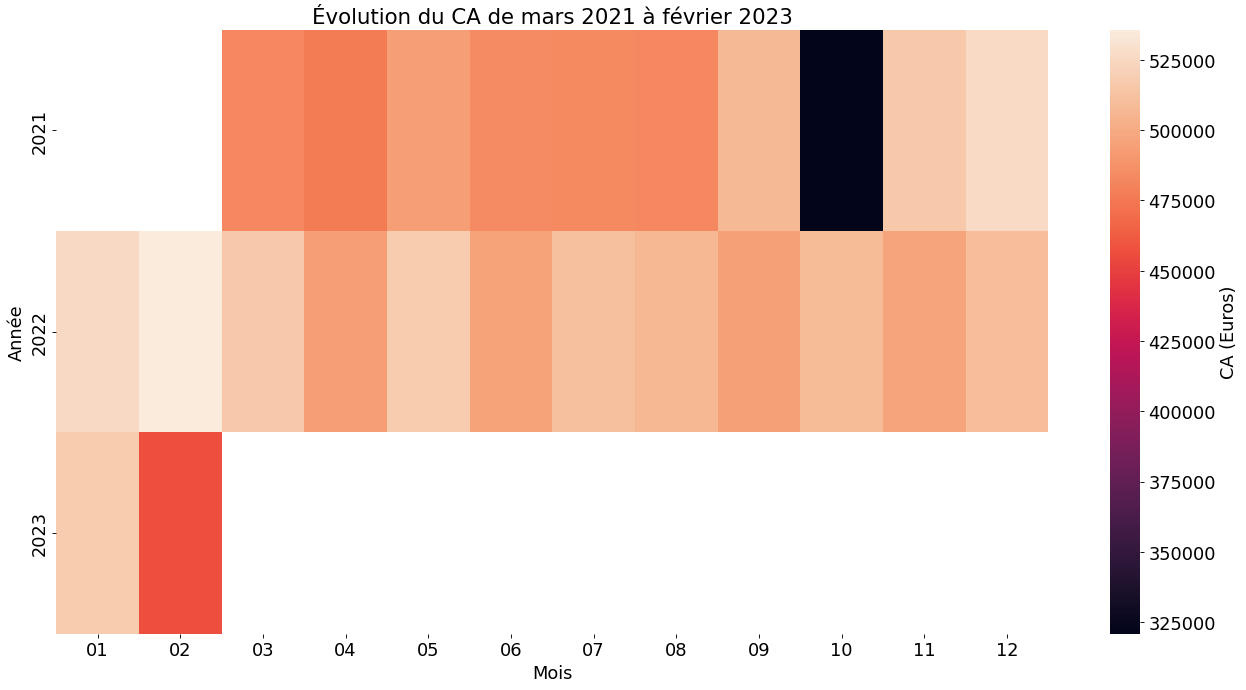

In [102]:
# On crée la colonne "Year" et "Month"
df["Year"]= df['date'].dt.strftime('%Y') # objet!
df["Month"]= df['date'].dt.strftime('%m') # objet!

# Nombre de vente pour chaque mois.
df_heat_map = df[["price","Year", 'Month']].groupby(["Year","Month"]).sum()
df_heat_map 

# Reformatage des données pour le "heatmap"
df_heat_map_year = df_heat_map.reset_index().pivot(index="Year", columns="Month", values="price")
df_heat_map_year

# Création du heatmap
sns.heatmap(df_heat_map_year, cbar_kws={"label": "CA (Euros)"})
plt.title("Évolution du CA de mars 2021 à février 2023")
plt.xlabel("Mois")
plt.ylabel("Année")

plt.show()

In [103]:
#CA_par_mois = df.groupby(["Year","Month"])[["price"]].sum().sort_values(by ="Year", ascending = True)
#CA_par_mois

CA_par_mois = df.groupby(["yyyy-mm"])[["price"]].sum().sort_values(by ="yyyy-mm", ascending = True)
CA_par_mois

# CA au mois d'Octobre 2021.
CA_par_mois.loc[("2021-10"), :][0]

print("CA en octobre 2021:",round(CA_par_mois.loc[("2021-10"), :][0]), "Euros.")

CA en octobre 2021: 320869 Euros.


**Au mois d'Octobre 2021, on note une forte baisse du CA! À quoi cette baisse peut-être dûe?. On analyse ce mois avec plus de précisions.** 



In [104]:
df.head()

,id_prod,price,categ,date,id_session,id_client,sex,birth,yyyy-mm,Year,Month
633192,0_1259,11.99,0,2021-03-01 00:01:07.843138,s_1,c_329,f,1967,2021-03,2021,03
273771,0_1390,19.37,0,2021-03-01 00:02:26.047414,s_2,c_664,m,1960,2021-03,2021,03
55629,0_1352,4.50,0,2021-03-01 00:02:38.311413,s_3,c_580,m,1988,2021-03,2021,03
209962,0_1458,6.55,0,2021-03-01 00:04:54.559692,s_4,c_7912,f,1989,2021-03,2021,03
293192,0_1358,16.49,0,2021-03-01 00:05:18.801198,s_5,c_2033,f,1956,2021-03,2021,03


In [105]:
df_mois = df[["categ","price","yyyy-mm"]]
df_mois = pd.pivot_table(df_mois, index=["yyyy-mm"], columns=["categ"], aggfunc=["sum","count"])
df_mois

sum                      count             
            price                      price             
categ           0         1         2      0      1     2
yyyy-mm                                                  
2021-03 193719.08 186974.17 101837.27  18140   9134  1336
2021-04 205362.32 156138.35 114748.49  19356   7579  1522
2021-05 196266.64 165893.40 130863.35  18509   8107  1677
2021-06 168013.08 189162.04 126983.37  15905   9264  1688
2021-07 144790.75 188523.27 149561.34  13582   9169  1991
...           ...       ...       ...    ...    ...   ...
2022-10 187529.07 199609.66 120878.94  17674   9726  1574
2022-11 184704.24 200427.99 111642.60  17320   9798  1456
2022-12 180530.64 205945.71 123803.09  16941  10063  1621
2023-01 181352.99 210104.41 126153.08  17075  10252  1618
2023-02 162526.93 180347.24 113875.52  15262   8789  1501

[24 rows x 6 columns]

In [106]:
# On renomme les colonnes de la table.
df_mois.columns = ["CA_categ_0","CA_categ_1","CA_categ_2", "nbr_vente_categ_0", "nbr_vente_categ_1","nbr_vente_categ_2" ]
df_mois

,CA_categ_0,CA_categ_1,CA_categ_2,nbr_vente_categ_0,nbr_vente_categ_1,nbr_vente_categ_2
yyyy-mm,,,,,,
2021-03,193719.08,186974.17,101837.27,18140,9134,1336
2021-04,205362.32,156138.35,114748.49,19356,7579,1522
2021-05,196266.64,165893.40,130863.35,18509,8107,1677
2021-06,168013.08,189162.04,126983.37,15905,9264,1688
2021-07,144790.75,188523.27,149561.34,13582,9169,1991
...,...,...,...,...,...,...
2022-10,187529.07,199609.66,120878.94,17674,9726,1574
2022-11,184704.24,200427.99,111642.60,17320,9798,1456
2022-12,180530.64,205945.71,123803.09,16941,10063,1621


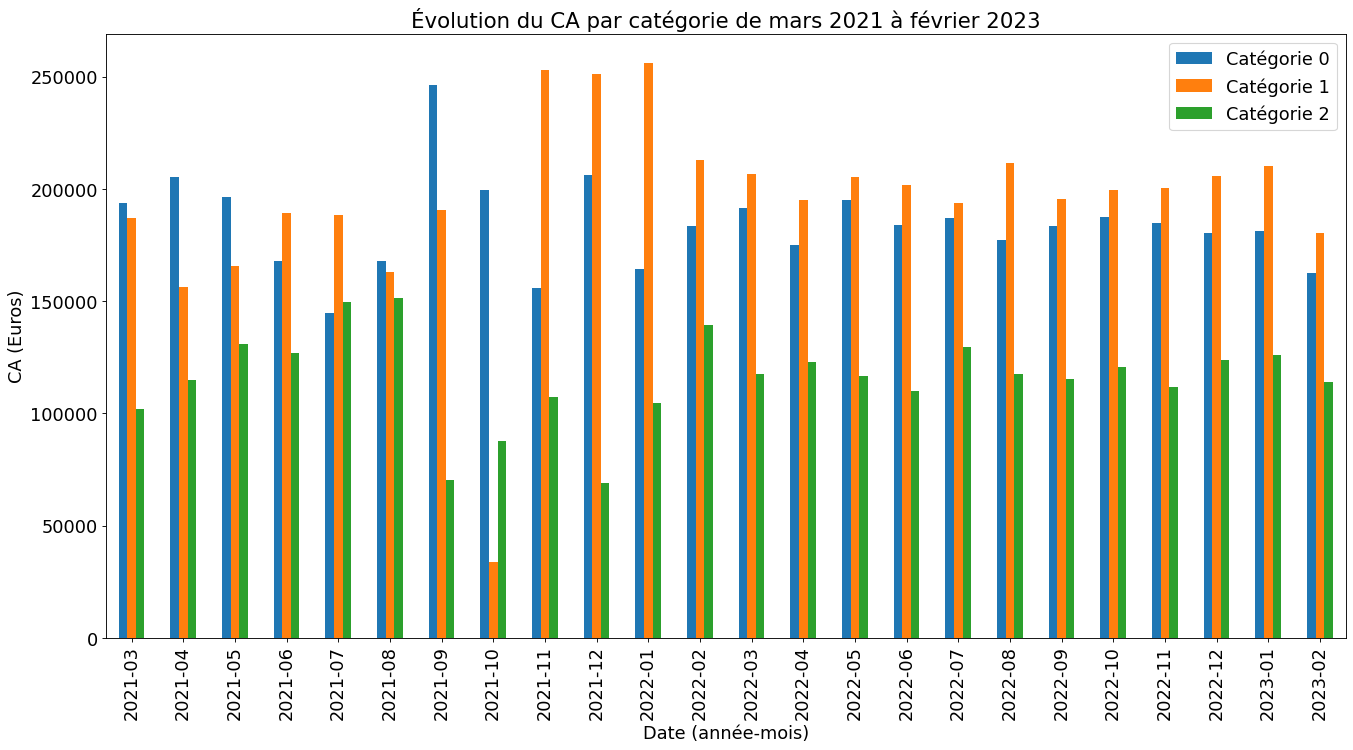

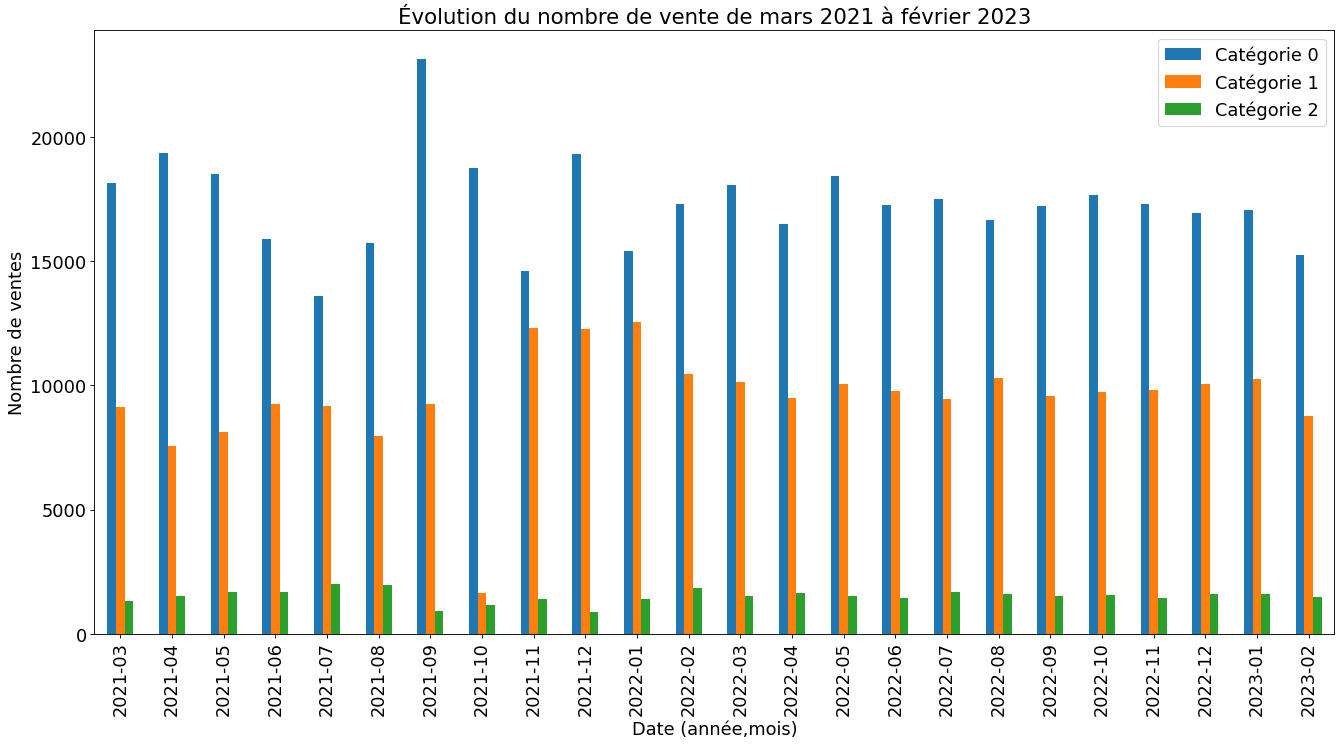

In [107]:
# Toutes les lignes, les trois premières colonnes uniquement:
df_mois.iloc[:,:3].plot.bar()
plt.legend(["Catégorie 0", "Catégorie 1", "Catégorie 2"])
plt.title("Évolution du CA par catégorie de mars 2021 à février 2023")
plt.xlabel("Date (année-mois)")
plt.ylabel("CA (Euros)")


# Toutes les lignes, les trois dernières  colonnes uniquement:
df_mois.iloc[:,3:].plot.bar()
plt.legend(["Catégorie 0", "Catégorie 1", "Catégorie 2"])
plt.title("Évolution du nombre de vente de mars 2021 à février 2023")
plt.xlabel("Date (année,mois)")
plt.ylabel("Nombre de ventes")

plt.show()

**On remarque qu'en Octobre 2021, le nombre de vente pour les produits de la catégorie 1 ont fortemment baissé.** 

In [108]:
df_mois

,CA_categ_0,CA_categ_1,CA_categ_2,nbr_vente_categ_0,nbr_vente_categ_1,nbr_vente_categ_2
yyyy-mm,,,,,,
2021-03,193719.08,186974.17,101837.27,18140,9134,1336
2021-04,205362.32,156138.35,114748.49,19356,7579,1522
2021-05,196266.64,165893.40,130863.35,18509,8107,1677
2021-06,168013.08,189162.04,126983.37,15905,9264,1688
2021-07,144790.75,188523.27,149561.34,13582,9169,1991
...,...,...,...,...,...,...
2022-10,187529.07,199609.66,120878.94,17674,9726,1574
2022-11,184704.24,200427.99,111642.60,17320,9798,1456
2022-12,180530.64,205945.71,123803.09,16941,10063,1621


In [109]:
df_mois.index

Index(['2021-03', '2021-04', '2021-05', '2021-06', '2021-07', '2021-08',
       '2021-09', '2021-10', '2021-11', '2021-12', '2022-01', '2022-02',
       '2022-03', '2022-04', '2022-05', '2022-06', '2022-07', '2022-08',
       '2022-09', '2022-10', '2022-11', '2022-12', '2023-01', '2023-02'],
      dtype='object', name='yyyy-mm')

In [110]:
# Nombre de vente au mois d'Octobre 2021 pour les produit de la catégorie 1.
df_mois.loc[("2021-10"), 'nbr_vente_categ_1']

1666

In [111]:
df

,id_prod,price,categ,date,id_session,id_client,sex,birth,yyyy-mm,Year,Month
633192,0_1259,11.99,0,2021-03-01 00:01:07.843138,s_1,c_329,f,1967,2021-03,2021,03
273771,0_1390,19.37,0,2021-03-01 00:02:26.047414,s_2,c_664,m,1960,2021-03,2021,03
55629,0_1352,4.50,0,2021-03-01 00:02:38.311413,s_3,c_580,m,1988,2021-03,2021,03
209962,0_1458,6.55,0,2021-03-01 00:04:54.559692,s_4,c_7912,f,1989,2021-03,2021,03
293192,0_1358,16.49,0,2021-03-01 00:05:18.801198,s_5,c_2033,f,1956,2021-03,2021,03
...,...,...,...,...,...,...,...,...,...,...,...
181209,1_508,21.92,1,2023-02-28 23:49:03.148402,s_348444,c_3573,f,1996,2023-02,2023,02
269714,2_37,48.99,2,2023-02-28 23:51:29.318531,s_348445,c_50,f,1994,2023-02,2023,02
533169,1_695,26.99,1,2023-02-28 23:53:18.929676,s_348446,c_488,f,1985,2023-02,2023,02
254099,0_1547,8.99,0,2023-02-28 23:58:00.107815,s_348447,c_4848,m,1953,2023-02,2023,02


In [112]:
df["Day"]= df['date'].dt.strftime('%d')
df_jour = df[["categ","price","Year","Month","Day"]]
df_jour= pd.pivot_table(df_jour, index=["Year", "Month", "Day"], columns=["categ"], aggfunc=["sum","count"])

# On renomme les colonnes de la table.
df_jour.columns = ["CA_categ_0","CA_categ_1","CA_categ_2", "nbr_vente_categ_0", "nbr_vente_categ_1","nbr_vente_categ_2" ]
df_jour

CA_categ_0  CA_categ_1  CA_categ_2  nbr_vente_categ_0  \
Year Month Day                                                          
2021 03    01      6272.64     6811.53     3491.04             582.00   
           02      6728.26     5627.15     3141.03             621.00   
           03      6121.03     5691.41     3386.25             591.00   
           04      5891.48     6098.98     3205.61             563.00   
           05      5975.97     7071.21     4424.19             561.00   
...                    ...         ...         ...                ...   
2023 02    24      6197.92     5471.07     3538.90             576.00   
           25      4942.69     8050.61     2767.95             458.00   
           26      5522.90     7009.09     3772.73             508.00   
           27      7437.43     6461.76     5271.62             703.00   
           28      4901.86     9226.25     3977.04             472.00   

                nbr_vente_categ_1  nbr_vente_categ_2  
Year Month Day                                        
2021 03    01              335.00              46.00  
           02              276.00              43.00  
           03              280.00              40.00  
           04              297.00              43.00  
           05              331.00              51.00  
...                           ...                ...  
2023 02    24              271.00              47.00  
           25              401.00              46.00  
           26              329.00              53.00  
           27              332.00              75.00  
           28              439.00              50.00  

[730 rows x 6 columns]

In [113]:
df.dtypes # datetime64[ns] vs. object?!

id_prod               object
price                float64
categ                  int64
date          datetime64[ns]
id_session            object
id_client             object
sex                   object
birth                  int64
yyyy-mm               object
Year                  object
Month                 object
Day                   object
dtype: object

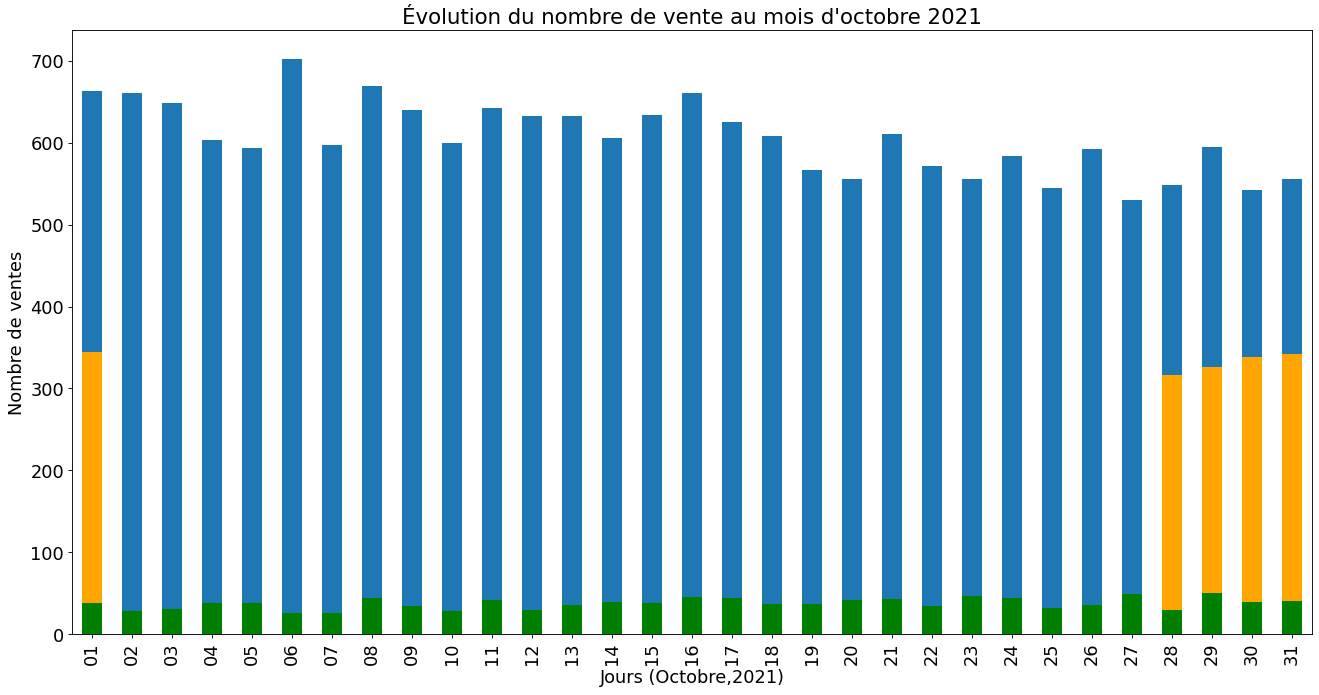

In [114]:
# Nombre de vente PAR JOUR au mois d'Octobre 2021 pour les produit de la catégorie 0,1 et 2.
df_jour.loc[("2021","10"), 'nbr_vente_categ_0'].plot.bar()
df_jour.loc[("2021","10"), 'nbr_vente_categ_1'].plot.bar(color= 'orange')
df_jour.loc[("2021","10"), 'nbr_vente_categ_2'].plot.bar(color= 'green')

plt.title("Évolution du nombre de vente au mois d'octobre 2021")
plt.xlabel("Jours (Octobre,2021)")
plt.ylabel("Nombre de ventes")


plt.show()

**Au mois d'Octobre, un problème d'enregistrement des ventes associés aux produits de la catégorie 1 est identifié. 
Le nombre de données manquantes n'est pas négligeable,ces données ne peuvent pas être remplacées. Entres autres l'id_prod, l'id_client et l'id_transactions ne sont pas disponibles. Nous poursuivons l'analyse ainsi.**

**Lapage en est informé. Des solutions pour éviter ce type de manquement sont en place?"**

**On remplace le CE du mois d'Octobre 2021 par la valeur médiane des CA obtenue les autres mois?????**

In [115]:
#df_avt_oct_2021 = df.loc[(df["yyyy-mm"] < "2021-10"), :]
#df_avt_oct_2021 = df_avt_oct_2021.groupby("yyyy-mm").sum().reset_index()
#df_avt_oct_2021

In [116]:
#df_modif = df.groupby("yyyy-mm")[["price"]].sum().reset_index()
#df_modif["price"] = np.where(df_modif["yyyy-mm"].str.contains("2021-10"),
                            #df_modif["price"].median(), df_modif["price"])

#df_modif.loc[df_modif["yyyy-mm"].str.contains('2021-10'), :]

**On étudie désormais l'évolution du CA au fil des mois, afin d'évaluer se tendance globale, en évitant de prendre en compte les éléments suivants:**
- la tendance: par exemple une croissance générale marquée du CA sur les 23 derniers mois.
- les effets saisonnierS: par exemple une augmentation du CA qui se concentre unique sur quelques mois de l'année.
- les résidus: par exemple une exceptionnelle forte augmentation du CA sur une moi quelconque. 

<AxesSubplot:xlabel='yyyy-mm'>

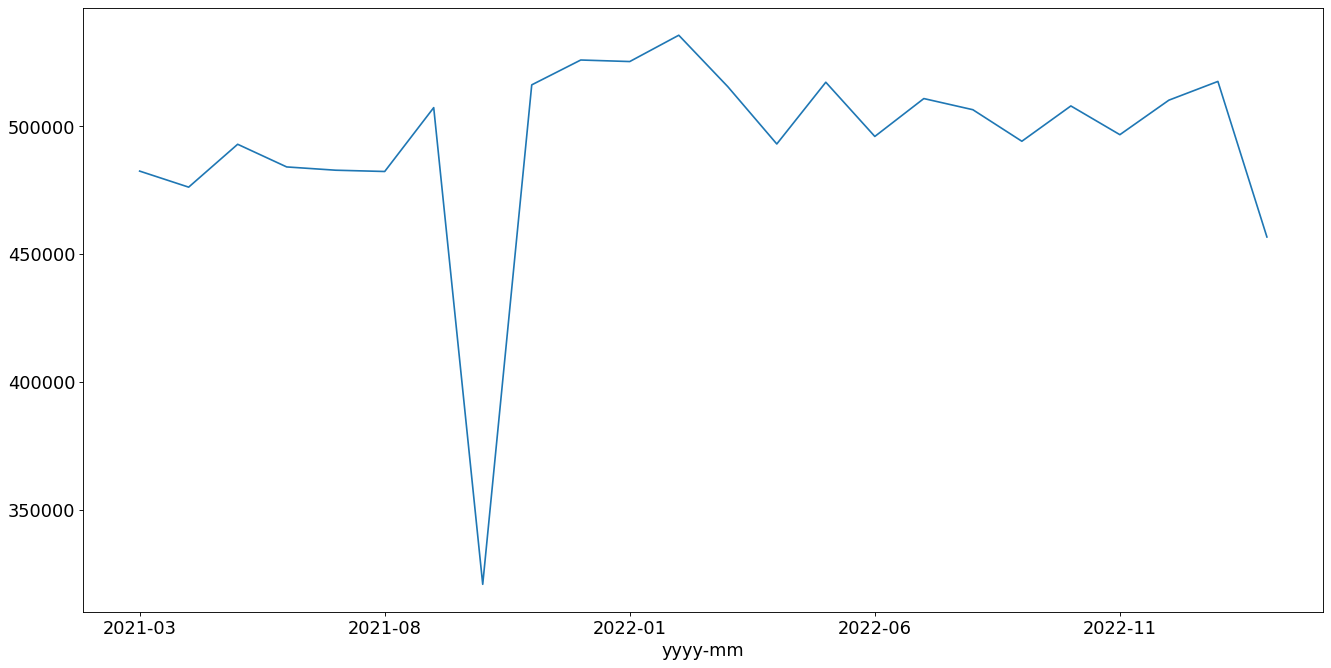

In [117]:
df.groupby("yyyy-mm").price.sum().plot()

In [118]:
df_date = df.groupby("yyyy-mm").price.sum()
df_date.index # date en index!

Index(['2021-03', '2021-04', '2021-05', '2021-06', '2021-07', '2021-08',
       '2021-09', '2021-10', '2021-11', '2021-12', '2022-01', '2022-02',
       '2022-03', '2022-04', '2022-05', '2022-06', '2022-07', '2022-08',
       '2022-09', '2022-10', '2022-11', '2022-12', '2023-01', '2023-02'],
      dtype='object', name='yyyy-mm')

**Est-ce un modèle additif?**

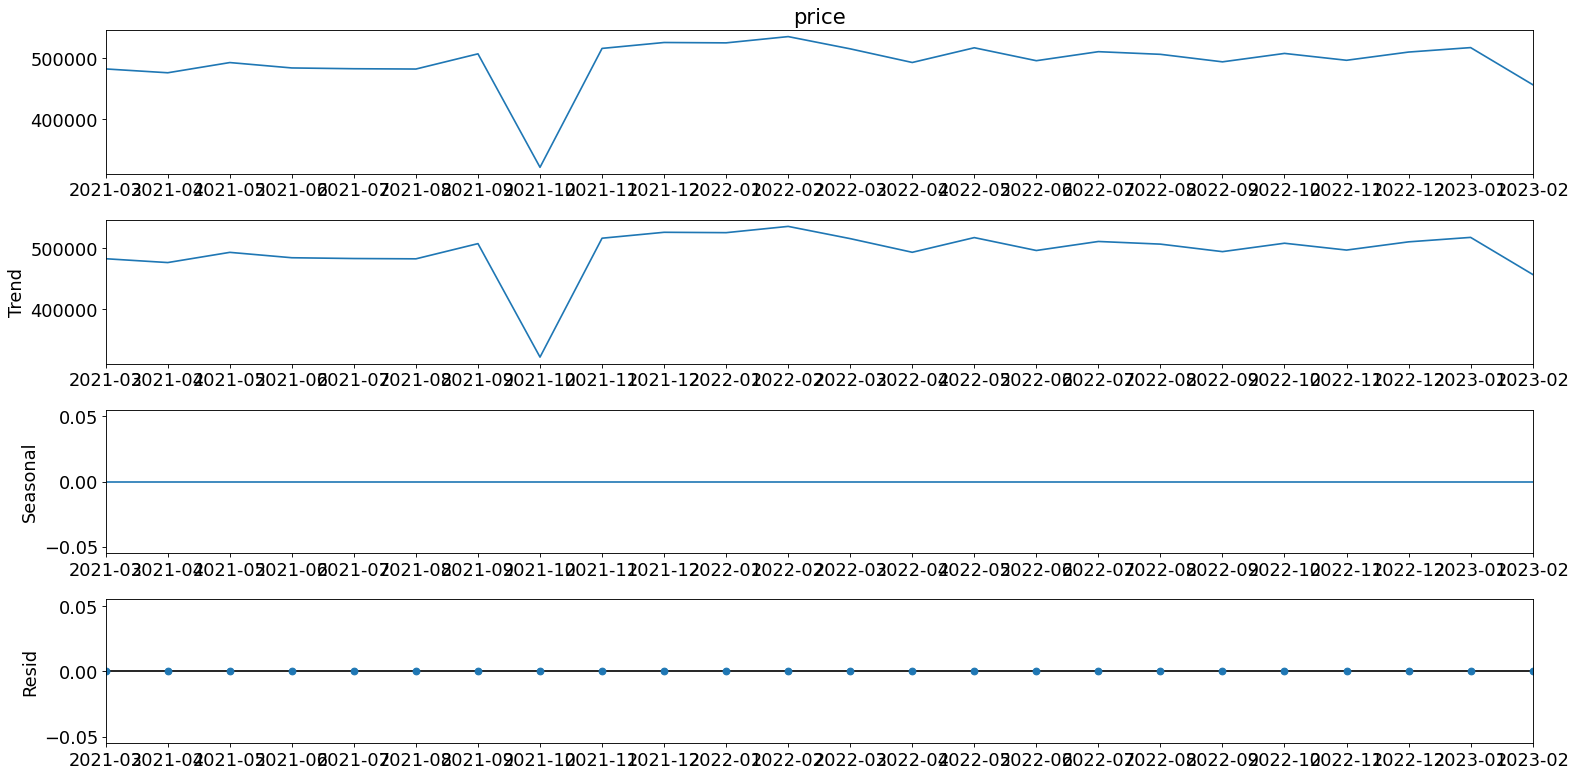

In [119]:
from statsmodels.tsa.seasonal import seasonal_decompose

TSA = seasonal_decompose(df_date, period=1).plot() #period=?? 
#TSA = seasonal_decompose(df_date, period =1, model= "multiplicative").plot()

**La variance pour les résidus est nulle et surtout elle est constante pour: "period=1".Le modèle additif ainsi défini est suffisant.**

**Il n'y a pas de saisonnalité**

**Il n'y a pas de tendance particulière. Le CA stagne sur le 12 derniers mois après une légère augmentation. Seulement, on note une diminution du CA en février 2023. Phénomène à suivre!**

**Pour passer d'un modèle multiplicatif à un modèle additif on peut passer par une transformation logarithmique. Cependant, il est plus simple d'analyser la tendance globale sur un modèle additif.  ????

**La série est-elle stationnaire?**

Elle semble stationnaire, étant donné que la décomposition n'a pas mis en relief: une tendance, une saisonnalité ou desrésidus en particulier. 
Mais nous décidons, tout de même, de réaliser un test statistique.

**Test de ADFuller - HO: La série temporelle n'est pas stationnaire.**

In [120]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df_date.values)
print("p-value: %f" %result[1])

p-value: 0.032706


**La p-value est inférieur au seuil choisi de 5%, nous pouvons considérer que la série temporelle est stationnaire.**

**Nous mettons en place la moyenne mobile pour faire apparaître la tendance globale de la série temporelle.**

In [121]:
df_date

yyyy-mm
2021-03   482530.52
2021-04   476249.16
2021-05   493023.39
2021-06   484158.49
2021-07   482875.36
             ...   
2022-10   508017.67
2022-11   496774.83
2022-12   510279.44
2023-01   517610.48
2023-02   456749.69
Name: price, Length: 24, dtype: float64

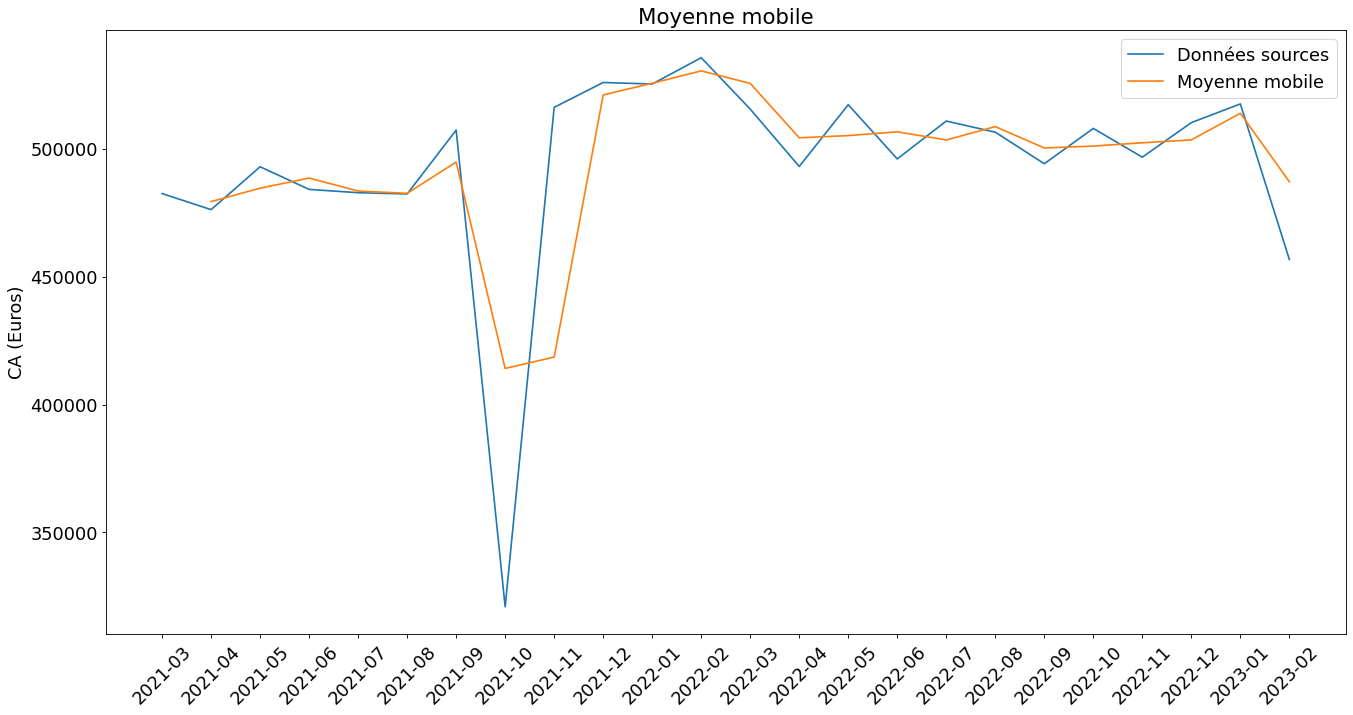

In [122]:
def plot_moyenne_mobile(timeseries):
    
# 1er_étape: Je détermine la moyenne mobile.
    moy_mobile = timeseries.rolling(window=2).mean() 
 
# 2ème_étape J'affiche la série temporelle avec la moyenne mobile
    source = plt.plot(timeseries, label= "Données sources")
    mean = plt.plot(moy_mobile, label= "Moyenne mobile")
    plt.legend(loc='best')
    plt.xticks(rotation=45)
    plt.ylabel("CA (Euros)")
    plt.title("Moyenne mobile")
    plt.show()
    

plot_moyenne_mobile(df_date)    
    

**Étudier le CA entre un jour J et un jour J-1, nous permet d'établir si il y a une relation ou non entre les achats effectués ou ils sont tout simplement dû au hasard.**

In [123]:
df

,id_prod,price,categ,date,id_session,id_client,sex,birth,yyyy-mm,Year,Month,Day
633192,0_1259,11.99,0,2021-03-01 00:01:07.843138,s_1,c_329,f,1967,2021-03,2021,03,01
273771,0_1390,19.37,0,2021-03-01 00:02:26.047414,s_2,c_664,m,1960,2021-03,2021,03,01
55629,0_1352,4.50,0,2021-03-01 00:02:38.311413,s_3,c_580,m,1988,2021-03,2021,03,01
209962,0_1458,6.55,0,2021-03-01 00:04:54.559692,s_4,c_7912,f,1989,2021-03,2021,03,01
293192,0_1358,16.49,0,2021-03-01 00:05:18.801198,s_5,c_2033,f,1956,2021-03,2021,03,01
...,...,...,...,...,...,...,...,...,...,...,...,...
181209,1_508,21.92,1,2023-02-28 23:49:03.148402,s_348444,c_3573,f,1996,2023-02,2023,02,28
269714,2_37,48.99,2,2023-02-28 23:51:29.318531,s_348445,c_50,f,1994,2023-02,2023,02,28
533169,1_695,26.99,1,2023-02-28 23:53:18.929676,s_348446,c_488,f,1985,2023-02,2023,02,28
254099,0_1547,8.99,0,2023-02-28 23:58:00.107815,s_348447,c_4848,m,1953,2023-02,2023,02,28


In [124]:
lag = df.groupby(["categ","Year","Month","Day"])[["price"]].sum() # lag: tous les jours
lag = lag.reset_index()
lag
#lag_short = lag.loc[lag["yyyy-mm"] > "2021-10"]
#lag_short 

,categ,Year,Month,Day,price
0,0,2021,03,01,6272.64
1,0,2021,03,02,6728.26
2,0,2021,03,03,6121.03
3,0,2021,03,04,5891.48
4,0,2021,03,05,5975.97
...,...,...,...,...,...
2159,2,2023,02,24,3538.90
2160,2,2023,02,25,2767.95
2161,2,2023,02,26,3772.73
2162,2,2023,02,27,5271.62


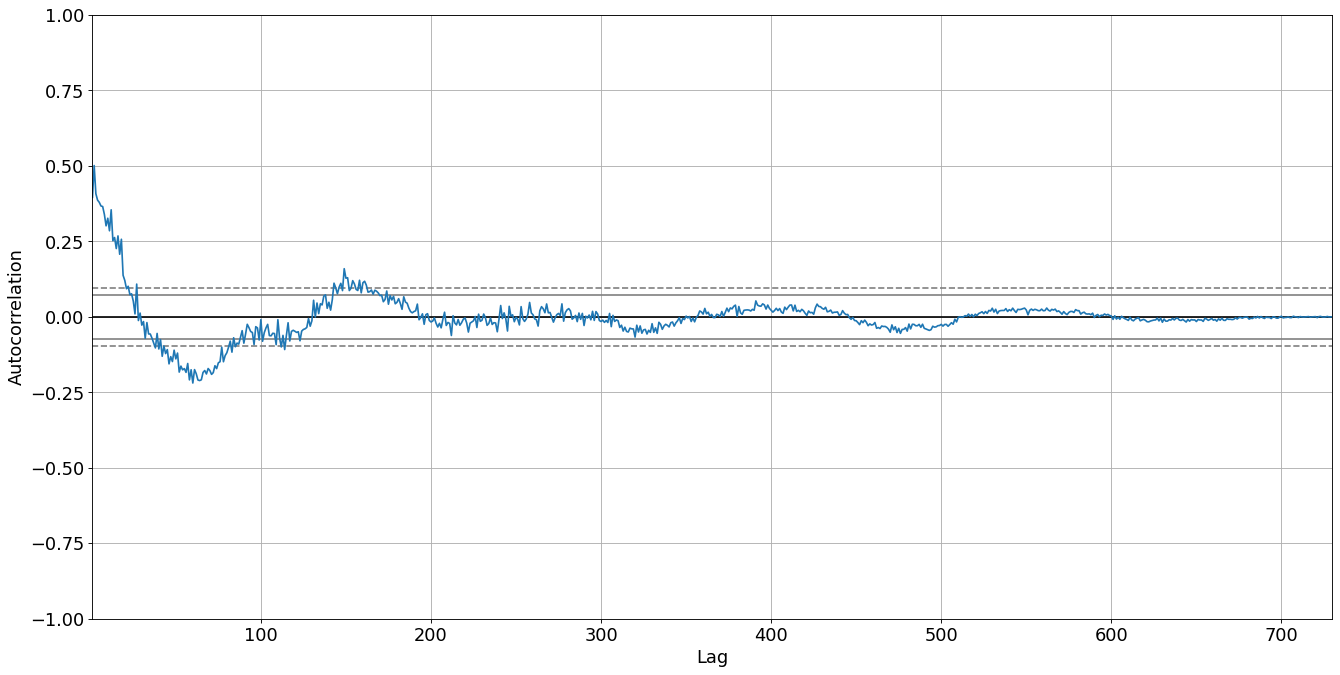

In [125]:
lag = df.groupby(["categ","Year","Month", "Day"])[["price"]].sum() # lag: tous les mois
lag = lag.reset_index()

#lag_short = lag_short.groupby(["categ","yyyy-mm"])[["price"]].sum() # lag: tous les mois
#lag_short = lag.reset_index()


# import autocorrelation function
from pandas.plotting import autocorrelation_plot

# autocorrelation plot
autocorrelation_plot(lag.loc[lag["categ"]== 0, "price"])
plt.show()

**La saisonnalité, n'est également pas perceptible ici. Il n'y pas d'oscillation à proprement parler entre les valeurs positives et négatives de l'autocorrélation.
L'autocorrélation diminue avec le temps, plus les achats sont éloignés dans le temps, moins ils sont associés entre eux.**

## 4.7 Profil des clients

### 4.7.1 Fréquence d'achat (nombre de produits achetés chaque mois)

In [126]:
#df['date_sans_heure'] = df['date'].dt.date
#df['date_sans_heure']

In [130]:
df.groupby("id_client")[["date"]].count().sort_values(by="date", ascending=False).head(10)


,date
id_client,
c_1609,25488
c_6714,9187
c_3454,6773
c_4958,5195
c_3263,403
c_2140,402
c_2595,398
c_2077,384
c_1637,380


On suppose que les id_client suivant: "c_1609", "c_6714", "c_3454" et "c_4958" correspondent à des professionnelle et non à des particulier, étant donné que le nombre de transaction est particulièrement élévé par aux autres.

On décide d'analyser les clients professionnels et particuliers séparement.

In [170]:
choicelist = ['professionel']

conditionlist = [df['id_client'].str.contains("c_1609|c_6714|c_3454 |c_4958") for c in choicelist]
conditionlist

df['type_client']= np.select(conditionlist, choicelist, default="particulier")  # objet
df['type_client']= df['type_client'].astype("string")
df['type_client'].value_counts()


particulier     639462
professionel     39870
Name: type_client, dtype: Int64

TypeError: can't multiply sequence by non-int of type 'float'

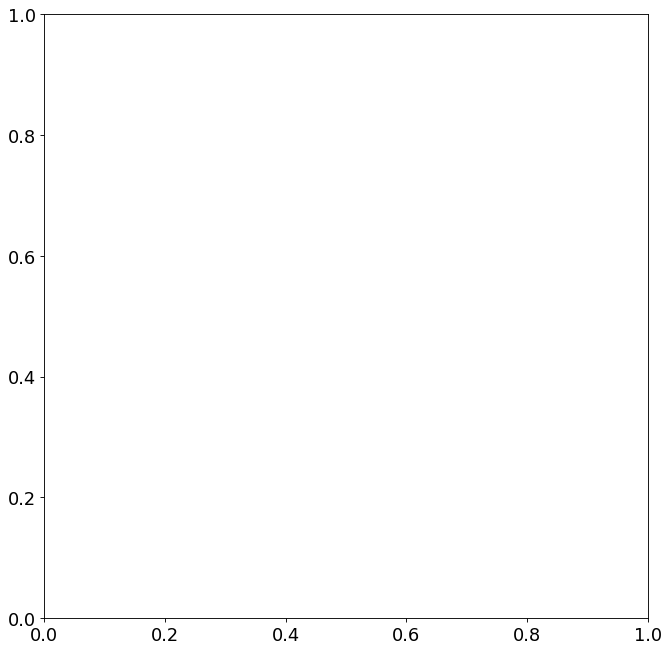

In [169]:
x = df['type_client'].value_counts()
tranche =  df['type_client'].value_counts().index
plt.pie(x, tranche)


### 4.7.2 Concernant l'âge

In [ ]:
df["age_client"]= 2023 - df["birth"] #type: int
df


In [ ]:
# Création de groupe d'âge
conditionlist = [
    (df["age_client"] < 15),
    (df["age_client"] > 15) & (df["age_client"] <= 24),
    (df["age_client"] > 24) & (df["age_client"] <= 64),
    (df["age_client"] > 64) 
    
]
choicelist = ["enfant","ado","adulte","aine"]
df["age_category"] = np.select(conditionlist,choicelist, default='?')
df

In [ ]:
pd.crosstab(index = df["age_category"],
            columns = [df.sex,df.categ],
            normalize = 'index').plot.bar(xlabel = "Catégorie d'âge", ylabel="")
plt.show()